### Import relevant packages

In [1]:
import requests
import pandas as pd
import numpy as np
import yfinance as yf
import time
from datetime import datetime
from datetime import timedelta
from datetime import date

In [2]:
response = requests.get("https://house-stock-watcher-data.s3-us-west-2.amazonaws.com/data/all_transactions.json")

In [3]:
dic = response.json()
df = pd.DataFrame(dic)
df['ticker'] = df['ticker'].replace({'BLFSD':'BLFS'})                                         
df.head()

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
0,2021,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
1,2021,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
2,2021,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
3,2021,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
4,2021,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False


In [4]:
Nancy_pelosi = df[df['representative'] == "Hon. Nancy Pelosi"]
Nancy_pelosi[Nancy_pelosi['amount'] == '$1,000,001 - $5,000,000'].head()

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
484,2020,09/03/2020,2020-08-07,self,FB,"Facebook, Inc. - Class A",sale_full,"$1,000,001 - $5,000,000",Hon. Nancy Pelosi,CA12,https://disclosures-clerk.house.gov/public_dis...,False
2843,2021,04/09/2021,2021-03-19,self,MSFT,Microsoft Corporation - Exercised 150 call opt...,purchase,"$1,000,001 - $5,000,000",Hon. Nancy Pelosi,CA12,https://disclosures-clerk.house.gov/public_dis...,False
2844,2021,04/09/2021,2021-03-19,self,MSFT,Microsoft Corporation - Exercised 100 call opt...,purchase,"$1,000,001 - $5,000,000",Hon. Nancy Pelosi,CA12,https://disclosures-clerk.house.gov/public_dis...,False
3559,2020,07/20/2020,2020-06-18,self,AAPL,Apple Inc.,sale_full,"$1,000,001 - $5,000,000",Hon. Nancy Pelosi,CA12,https://disclosures-clerk.house.gov/public_dis...,False
3560,2020,07/20/2020,2020-06-18,self,NFLX,"Netflix, Inc.",purchase,"$1,000,001 - $5,000,000",Hon. Nancy Pelosi,CA12,https://disclosures-clerk.house.gov/public_dis...,False


In [5]:
purch_dates = df[df["type"]=="purchase"].groupby(['transaction_date', 'ticker']).size().reset_index(name="freq")
purch_dates = purch_dates[purch_dates["ticker"]!="--"].reset_index(drop=True)
purch_dates

,transaction_date,ticker,freq
0,2012-06-19,BLFS,1
1,2017-09-05,SUP,1
2,2017-12-06,CAT,1
3,2018-04-17,BA,1
4,2018-04-30,CTRL,1
...,...,...,...
5914,2022-03-14,T,1
5915,2022-03-17,AXP,1
5916,2022-03-17,GD,1
5917,2022-03-17,TSLA,1


In [6]:
for i in range(len(purch_dates)):
    date_time_obj = datetime.strptime(purch_dates.loc[i,'transaction_date'], '%Y-%m-%d')
    NextDay_date  = date_time_obj + timedelta(days=1)
    his1mon_date  = date_time_obj - timedelta(days=30)
    his3mon_date  = date_time_obj - timedelta(days=90)
    his6mon_date  = date_time_obj - timedelta(days=180)
    his9mon_date  = date_time_obj - timedelta(days=270)
    his12mon_date = date_time_obj - timedelta(days=365)
    purch_dates.loc[i, "trans_date"]    = date_time_obj
    purch_dates.loc[i, "next_date"]     = NextDay_date
    purch_dates.loc[i, "his1mon_date"]  = his1mon_date
    purch_dates.loc[i, "his3mon_date"]  = his3mon_date
    purch_dates.loc[i, "his6mon_date"]  = his6mon_date
    purch_dates.loc[i, "his9mon_date"]  = his9mon_date
    purch_dates.loc[i, "his12mon_date"] = his12mon_date
    
    his1mon_date_nxt  = date_time_obj - timedelta(days=29)
    his3mon_date_nxt  = date_time_obj - timedelta(days=89)
    his6mon_date_nxt  = date_time_obj - timedelta(days=179)
    his9mon_date_nxt  = date_time_obj - timedelta(days=269)
    his12mon_date_nxt = date_time_obj - timedelta(days=364)
    
    purch_dates.loc[i, "his1mon_date_nxt"]  = his1mon_date_nxt
    purch_dates.loc[i, "his3mon_date_nxt"]  = his3mon_date_nxt
    purch_dates.loc[i, "his6mon_date_nxt"]  = his6mon_date_nxt
    purch_dates.loc[i, "his9mon_date_nxt"]  = his9mon_date_nxt
    purch_dates.loc[i, "his12mon_date_nxt"] = his12mon_date_nxt

    
purch_dates

,transaction_date,ticker,freq,trans_date,next_date,his1mon_date,his3mon_date,his6mon_date,his9mon_date,his12mon_date,his1mon_date_nxt,his3mon_date_nxt,his6mon_date_nxt,his9mon_date_nxt,his12mon_date_nxt
0,2012-06-19,BLFS,1,2012-06-19,2012-06-20,2012-05-20,2012-03-21,2011-12-22,2011-09-23,2011-06-20,2012-05-21,2012-03-22,2011-12-23,2011-09-24,2011-06-21
1,2017-09-05,SUP,1,2017-09-05,2017-09-06,2017-08-06,2017-06-07,2017-03-09,2016-12-09,2016-09-05,2017-08-07,2017-06-08,2017-03-10,2016-12-10,2016-09-06
2,2017-12-06,CAT,1,2017-12-06,2017-12-07,2017-11-06,2017-09-07,2017-06-09,2017-03-11,2016-12-06,2017-11-07,2017-09-08,2017-06-10,2017-03-12,2016-12-07
3,2018-04-17,BA,1,2018-04-17,2018-04-18,2018-03-18,2018-01-17,2017-10-19,2017-07-21,2017-04-17,2018-03-19,2018-01-18,2017-10-20,2017-07-22,2017-04-18
4,2018-04-30,CTRL,1,2018-04-30,2018-05-01,2018-03-31,2018-01-30,2017-11-01,2017-08-03,2017-04-30,2018-04-01,2018-01-31,2017-11-02,2017-08-04,2017-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5914,2022-03-14,T,1,2022-03-14,2022-03-15,2022-02-12,2021-12-14,2021-09-15,2021-06-17,2021-03-14,2022-02-13,2021-12-15,2021-09-16,2021-06-18,2021-03-15
5915,2022-03-17,AXP,1,2022-03-17,2022-03-18,2022-02-15,2021-12-17,2021-09-18,2021-06-20,2021-03-17,2022-02-16,2021-12-18,2021-09-19,2021-06-21,2021-03-18
5916,2022-03-17,GD,1,2022-03-17,2022-03-18,2022-02-15,2021-12-17,2021-09-18,2021-06-20,2021-03-17,2022-02-16,2021-12-18,2021-09-19,2021-06-21,2021-03-18
5917,2022-03-17,TSLA,1,2022-03-17,2022-03-18,2022-02-15,2021-12-17,2021-09-18,2021-06-20,2021-03-17,2022-02-16,2021-12-18,2021-09-19,2021-06-21,2021-03-18


In [7]:
day_price = pd.DataFrame(columns=["ticker", "date","price"])

for i in range(len(purch_dates)):
    ticker = yf.Ticker(purch_dates.loc[i,"ticker"])
    time.sleep(0.5)
    val = ticker.history(start=purch_dates.loc[i,"trans_date"],
                         end  =purch_dates.loc[i,"next_date"])
    print(i,". ", purch_dates.loc[i,"ticker"], "\t",val[["Open","Close"]],"\n\n")
    try:
        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],
                            "date":[purch_dates.loc[i,"transaction_date"]],
                            "price":[val["Close"].values[0]]})
    except:
        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],
                            "date":[purch_dates.loc[i,"transaction_date"]],
                            "price":[np.nan]})
    day_price = pd.concat([day_price,row], axis = 0)

day_price.to_csv("day_price.csv")

0 .  BLFS 	             Open  Close
Date                   
2012-06-19  1.12   1.12 


1 .  SUP 	                  Open      Close
Date                            
2017-09-05  13.511669  13.465866 


2 .  CAT 	                   Open       Close
Date                              
2017-12-06  126.147104  126.318123 


3 .  BA 	                   Open      Close
Date                             
2018-04-17  320.570022  322.47583 


- CTRL: No data found, symbol may be delisted
4 .  CTRL 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5 .  CRTL 	               Open   Close
Date                      
2018-06-27  0.0089  0.0089 


6 .  VZ 	                  Open      Close
Date                            
2018-06-27  41.781025  41.891468 


7 .  C 	                  Open      Close
Date                            
2018-10-01  64.561341  64.284294 


8 .  CAT 	                   Open       Close
Date                              
2018-10-01  140.459365  139.243225 


9 .  CSCO 	       

73 .  FLR 	                  Open      Close
Date                            
2019-02-15  34.222413  34.855984 


74 .  ITUB 	                 Open     Close
Date                          
2019-02-15  7.313997  7.343021 


75 .  JCI 	                  Open      Close
Date                            
2019-02-15  32.313893  32.536362 


76 .  KUBTY 	                  Open      Close
Date                            
2019-02-15  65.605053  66.343758 


77 .  NOV 	                  Open      Close
Date                            
2019-02-15  28.886794  29.220066 


78 .  NSRGY 	                  Open      Close
Date                            
2019-02-15  81.833488  82.240898 


79 .  PCH 	                 Open      Close
Date                           
2019-02-15  29.11053  29.350498 


- RDS.B: No data found for this date range, symbol may be delisted
80 .  RDS.B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


81 .  RHHBY 	                 Open      Close
Date                       

146 .  RDUS 	                  Open      Close
Date                            
2019-04-03  21.870001  22.290001 


147 .  WPC 	                  Open      Close
Date                            
2019-04-03  66.283049  66.485619 


148 .  ZEN 	                  Open  Close
Date                        
2019-04-03  86.580002  85.43 


149 .  BBVA 	                 Open     Close
Date                          
2019-04-05  5.163596  5.163596 


150 .  FMX 	                  Open      Close
Date                            
2019-04-05  88.635323  90.487404 


151 .  SGSOY 	                  Open      Close
Date                            
2019-04-05  23.063314  23.172361 


152 .  SGSOY 	                  Open      Close
Date                            
2019-04-08  23.117839  23.208712 


153 .  VIOT 	              Open  Close
Date                    
2019-04-08  11.39  11.25 


154 .  RIO 	                  Open      Close
Date                            
2019-04-10  55.490245  55.110477 




218 .  GBT 	                  Open      Close
Date                            
2019-06-04  58.950001  59.830002 


219 .  LAUR 	                 Open    Close
Date                         
2019-06-04  9.283927  9.46387 


220 .  PRA 	                  Open      Close
Date                            
2019-06-04  36.102962  36.575638 


221 .  SITC 	                  Open     Close
Date                           
2019-06-04  11.514663  11.69472 


222 .  UBSI 	                  Open      Close
Date                            
2019-06-04  31.561738  32.608604 


223 .  EXAS 	                   Open       Close
Date                              
2019-06-19  116.220001  115.989998 


224 .  NVCR 	                  Open      Close
Date                            
2019-06-19  59.950001  61.509998 


- PS: No data found, symbol may be delisted
225 .  PS 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


226 .  SPY 	                   Open       Close
Date                              
2019-

291 .  RHP 	                  Open      Close
Date                            
2019-12-12  83.252316  81.567436 


292 .  VCYT 	                  Open      Close
Date                            
2019-12-12  28.629999  28.629999 


293 .  SH 	                  Open      Close
Date                            
2019-12-13  24.458171  24.428308 


294 .  SRPT 	              Open       Close
Date                         
2019-12-13  125.5  132.050003 


295 .  BMRN 	                  Open  Close
Date                        
2019-12-16  83.010002   83.5 


296 .  KO 	                  Open      Close
Date                            
2019-12-16  50.874788  50.623623 


297 .  SSNC 	                  Open      Close
Date                            
2019-12-16  57.952174  58.951515 


- CWEN.A: No data found, symbol may be delisted
298 .  CWEN.A 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


299 .  DUK 	                  Open      Close
Date                            
2019-12-17  82.4869

363 .  C 	                  Open      Close
Date                            
2019-12-31  73.405971  73.933472 


364 .  CB 	                   Open       Close
Date                              
2019-12-31  148.028291  148.534027 


365 .  CL 	                  Open      Close
Date                            
2019-12-31  65.317799  65.384285 


366 .  COF 	                  Open      Close
Date                            
2019-12-31  99.371498  99.807938 


367 .  COST 	                   Open       Close
Date                              
2019-12-31  282.462554  281.428467 


368 .  CSCO 	                  Open      Close
Date                            
2019-12-31  44.087713  44.477211 


369 .  DHR 	                   Open       Close
Date                              
2019-12-31  151.488262  152.242126 


370 .  DIS 	                   Open       Close
Date                              
2019-12-31  143.669998  144.630005 


371 .  FIKMX 	                 Open     Close
Date        

434 .  C 	                  Open      Close
Date                            
2020-01-09  74.942212  74.109314 


435 .  CB 	                   Open       Close
Date                              
2020-01-09  146.482454  146.902313 


436 .  CMCSA 	                  Open      Close
Date                            
2020-01-09  43.355248  43.469868 


437 .  CXW 	                  Open      Close
Date                            
2020-01-09  15.401739  14.987559 


438 .  DASTY 	                  Open      Close
Date                            
2020-01-09  33.696855  33.667095 


439 .  EDIT 	                  Open  Close
Date                        
2020-01-09  31.530001  30.65 


440 .  ENV 	                  Open      Close
Date                            
2020-01-09  73.620003  73.629997 


441 .  ETN 	                  Open      Close
Date                            
2020-01-09  90.284835  89.888229 


442 .  KMPR 	                  Open      Close
Date                            
2020

506 .  TCEHY 	                  Open      Close
Date                            
2020-01-13  50.272121  50.581547 


507 .  TGT 	                   Open       Close
Date                              
2020-01-13  119.946869  119.253708 


508 .  TJX 	                  Open      Close
Date                            
2020-01-13  60.954596  61.150215 


509 .  UL 	                  Open      Close
Date                            
2020-01-13  52.028655  52.269184 


510 .  UNICY 	                 Open     Close
Date                          
2020-01-13  6.762597  6.851319 


511 .  YNDX 	                  Open      Close
Date                            
2020-01-13  44.459999  44.299999 


512 .  AAPL 	                  Open      Close
Date                            
2020-01-14  77.916884  76.927849 


513 .  AMGN 	                   Open       Close
Date                              
2020-01-14  220.679883  224.610565 


514 .  BMY 	                  Open      Close
Date                  

578 .  NXPI 	                  Open       Close
Date                             
2020-01-22  130.69491  130.811493 


579 .  SYF 	                  Open      Close
Date                            
2020-01-22  33.923368  34.252537 


- GSAH: No data found, symbol may be delisted
580 .  GSAH 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


581 .  CRWD 	             Open  Close
Date                   
2020-01-24  62.0  59.25 


582 .  DAL 	                  Open      Close
Date                            
2020-01-24  59.688042  58.406887 


583 .  EL 	                   Open       Close
Date                              
2020-01-24  205.714079  202.111618 


- FLIR: No data found, symbol may be delisted
584 .  FLIR 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


- GSAH: No data found, symbol may be delisted
585 .  GSAH 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


586 .  LVMUY 	                  Open      Close
Date                            
2020-01-24  88.717142  88

- DEACU: No data found, symbol may be delisted
651 .  DEACU 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


652 .  GO 	                  Open      Close
Date                            
2020-01-30  32.900002  32.610001 


653 .  KMTUY 	                  Open     Close
Date                           
2020-01-30  21.583394  21.68766 


654 .  PRU 	                  Open      Close
Date                            
2020-01-30  80.782378  82.664551 


655 .  ABMD 	                   Open       Close
Date                              
2020-01-31  186.339996  186.289993 


656 .  BYND 	               Open       Close
Date                          
2020-01-31  117.43  110.419998 


- DEACU: No data found, symbol may be delisted
657 .  DEACU 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


658 .  ZBRA 	              Open       Close
Date                         
2020-01-31  245.5  239.020004 


659 .  APD 	                   Open       Close
Date                              
2020-02

723 .  TMUS 	                  Open      Close
Date                            
2020-02-13  95.120003  95.139999 


724 .  WFC 	                  Open      Close
Date                            
2020-02-13  45.441914  45.919044 


725 .  ACN 	                   Open       Close
Date                              
2020-02-14  207.581512  206.724899 


726 .  BGFV 	                 Open     Close
Date                          
2020-02-14  2.860201  3.004485 


727 .  C 	                  Open      Close
Date                            
2020-02-14  73.492097  73.398941 


728 .  CGNX 	                  Open      Close
Date                            
2020-02-14  50.724895  51.942291 


729 .  EL 	                   Open       Close
Date                              
2020-02-14  212.082352  211.629578 


- FLIR: No data found, symbol may be delisted
730 .  FLIR 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


731 .  GH 	                  Open      Close
Date                            

795 .  HMN 	                  Open      Close
Date                            
2020-02-21  42.178946  42.067116 


796 .  IGV 	                  Open       Close
Date                             
2020-02-21  260.84444  256.739075 


797 .  MSFT 	                   Open      Close
Date                             
2020-02-21  179.862286  175.36499 


798 .  NULG 	                  Open      Close
Date                            
2020-02-21  42.536498  42.156956 


799 .  OLLI 	              Open      Close
Date                        
2020-02-21  56.43  57.099998 


800 .  PHG 	                  Open      Close
Date                            
2020-02-21  46.129442  46.119835 


801 .  ROKU 	                   Open       Close
Date                              
2020-02-21  122.949997  119.379997 


802 .  RPD 	              Open      Close
Date                        
2020-02-21  54.43  52.990002 


803 .  SCHD 	                  Open      Close
Date                            
2020-02-

866 .  APO 	                 Open      Close
Date                           
2020-03-02  38.89265  40.323826 


867 .  CB 	                   Open      Close
Date                             
2020-03-02  138.486072  144.86026 


868 .  CG 	                  Open      Close
Date                            
2020-03-02  27.033603  28.878094 


869 .  DEO 	                   Open       Close
Date                              
2020-03-02  136.258097  139.143387 


870 .  DGX 	                   Open       Close
Date                              
2020-03-02  102.282182  107.186905 


871 .  ED 	                 Open      Close
Date                           
2020-03-02  73.43597  77.994003 


872 .  ENS 	                  Open      Close
Date                            
2020-03-02  60.696367  62.527046 


873 .  GSK 	                  Open      Close
Date                            
2020-03-02  36.924996  38.246311 


874 .  HELE 	              Open   Close
Date                     
2020-03-

937 .  HELE 	                   Open  Close
Date                         
2020-03-10  147.830002  146.5 


938 .  HMN 	                  Open      Close
Date                            
2020-03-10  38.581717  38.041199 


939 .  IART 	                  Open  Close
Date                        
2020-03-10  46.779999  49.23 


940 .  INTC 	                  Open      Close
Date                            
2020-03-10  50.046555  51.203812 


941 .  QDEL 	                  Open  Close
Date                        
2020-03-10  81.769997  80.93 


942 .  RPD 	              Open      Close
Date                        
2020-03-10  43.23  42.419998 


943 .  SCHW 	                  Open      Close
Date                            
2020-03-10  31.030723  32.062485 


944 .  SH 	                  Open      Close
Date                            
2020-03-10  26.734635  26.384966 


945 .  TGT 	                   Open       Close
Date                              
2020-03-10  102.862824  104.886391 




1009 .  BHKLY 	                  Open      Close
Date                            
2020-03-18  50.633281  50.848782 


1010 .  BNTGY 	                 Open     Close
Date                          
2020-03-18  6.286544  5.989466 


1011 .  BR 	                  Open      Close
Date                            
2020-03-18  96.392083  97.728714 


- BRK.B: No data found, symbol may be delisted
1012 .  BRK.B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


1013 .  BSX 	              Open  Close
Date                    
2020-03-18  26.98  27.24 


1014 .  BTI 	                  Open      Close
Date                            
2020-03-18  26.518081  26.419134 


1015 .  BTLCY 	                 Open     Close
Date                          
2020-03-18  3.848556  3.737272 


1016 .  BUD 	                  Open      Close
Date                            
2020-03-18  33.306202  34.543404 


1017 .  BURBY 	                  Open     Close
Date                           
2020-03-18  12.938921  1

1081 .  IP 	                  Open      Close
Date                            
2020-03-18  26.455218  26.757809 


1082 .  IPG 	                  Open      Close
Date                            
2020-03-18  13.385487  13.551422 


1083 .  IR 	                  Open      Close
Date                            
2020-03-18  19.814322  19.204803 


1084 .  IT 	                  Open      Close
Date                            
2020-03-18  84.120003  83.379997 


1085 .  JAPAY 	                 Open     Close
Date                          
2020-03-18  7.270364  7.510374 


1086 .  JAPSY 	             Open  Close
Date                   
2020-03-18   9.5  8.958 


1087 .  JBAXY 	                Open     Close
Date                         
2020-03-18  4.70031  4.590361 


1088 .  JHX 	                  Open      Close
Date                            
2020-03-18  10.652381  10.642696 


1089 .  JSAIY 	                 Open     Close
Date                          
2020-03-18  9.441979  9.249098 



1154 .  STT 	                  Open      Close
Date                            
2020-03-18  43.462067  42.338535 


1155 .  SVNDY 	                  Open      Close
Date                            
2020-03-18  13.447596  14.239199 


1156 .  SVNLY 	                 Open     Close
Date                          
2020-03-18  3.053312  3.045059 


1157 .  SWDBY 	                 Open     Close
Date                          
2020-03-18  9.497661  9.379726 


1158 .  SWGAY 	                 Open     Close
Date                          
2020-03-18  8.063412  8.254715 


1159 .  SWMAY 	                 Open     Close
Date                          
2020-03-18  5.148314  4.780303 


1160 .  SWRAY 	                 Open     Close
Date                          
2020-03-18  5.741942  5.857135 


1161 .  SXYAY 	                  Open      Close
Date                            
2020-03-18  13.181962  13.494656 


1162 .  SYF 	                  Open      Close
Date                            
2020-03-

1226 .  UNH 	                   Open       Close
Date                              
2020-03-23  196.280996  189.305664 


- UTX: No data found, symbol may be delisted
1227 .  UTX 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


1228 .  WCC 	                  Open  Close
Date                        
2020-03-23  17.200001  18.65 


1229 .  WM 	                  Open      Close
Date                            
2020-03-23  95.323327  84.872437 


1230 .  CACI 	                   Open       Close
Date                              
2020-03-24  190.850006  197.649994 


1231 .  CNC 	                  Open  Close
Date                        
2020-03-24  48.169998  48.73 


1232 .  COLD 	                 Open     Close
Date                          
2020-03-24  27.08188  29.15057 


1233 .  COST 	                   Open       Close
Date                              
2020-03-24  282.664687  273.405334 


1234 .  DIA 	                   Open       Close
Date                              
202

1298 .  CVX 	                  Open      Close
Date                            
2020-03-27  64.929736  61.922726 


1299 .  DBSDY 	                 Open      Close
Date                           
2020-03-27  50.53219  48.321121 


1300 .  DE 	                   Open       Close
Date                              
2020-03-27  130.926872  131.033554 


1301 .  DHR 	                   Open       Close
Date                              
2020-03-27  133.233656  137.653915 


1302 .  DIA 	                   Open      Close
Date                             
2020-03-27  209.791645  208.57692 


1303 .  FB 	                   Open       Close
Date                              
2020-03-27  158.199997  156.789993 


1304 .  GOOGL 	                    Open       Close
Date                               
2020-03-27  1127.469971  1110.26001 


1305 .  HD 	                   Open       Close
Date                              
2020-03-27  180.494804  182.467422 


1306 .  HLT 	             Open      Cl

1369 .  AMZN 	                    Open        Close
Date                                
2020-04-02  1901.640015  1918.829956 


1370 .  AON 	                  Open      Close
Date                            
2020-04-02  149.78958  154.61705 


1371 .  ATO 	                  Open      Close
Date                            
2020-04-02  88.877587  92.536476 


1372 .  BAX 	                  Open      Close
Date                            
2020-04-02  76.342636  80.113487 


1373 .  BK 	                  Open      Close
Date                            
2020-04-02  30.567517  31.737383 


1374 .  BLL 	                  Open      Close
Date                            
2020-04-02  62.748485  63.565701 


1375 .  CAT 	                   Open       Close
Date                              
2020-04-02  105.995303  111.245987 


1376 .  CFG 	                  Open      Close
Date                            
2020-04-02  15.702924  15.903775 


1377 .  CHTR 	                  Open       Close
Date 

1441 .  GOOGL 	                    Open        Close
Date                                
2020-04-03  1114.709961  1092.699951 


1442 .  HQY 	              Open  Close
Date                    
2020-04-03  44.52  41.09 


1443 .  LGND 	                  Open      Close
Date                            
2020-04-03  71.839996  73.230003 


1444 .  LHX 	                   Open       Close
Date                              
2020-04-03  176.814742  172.062546 


1445 .  MDT 	                  Open      Close
Date                            
2020-04-03  82.292036  82.521606 


1446 .  MOS 	                 Open     Close
Date                          
2020-04-03  9.701517  9.750564 


1447 .  SSNC 	                  Open      Close
Date                            
2020-04-03  40.152349  40.810265 


1448 .  USFD 	              Open  Close
Date                    
2020-04-03  15.24  14.06 


1449 .  AAPL 	                  Open      Close
Date                            
2020-04-06  61.874764 

1513 .  TT 	                 Open      Close
Date                           
2020-04-09  86.95353  88.795357 


1514 .  WDC 	                  Open      Close
Date                            
2020-04-09  46.709999  45.049999 


1515 .  ANET 	              Open  Close
Date                    
2020-04-13  52.25  50.52 


1516 .  CVI 	                  Open      Close
Date                            
2020-04-13  16.341109  16.174093 


1517 .  DRI 	                  Open      Close
Date                            
2020-04-13  62.826634  58.854057 


1518 .  DUK 	                  Open      Close
Date                            
2020-04-13  82.544423  80.489799 


1519 .  FSD 	                  Open      Close
Date                            
2020-04-13  10.803219  10.635986 


1520 .  GSK 	                  Open      Close
Date                            
2020-04-13  34.965487  35.001438 


1521 .  KMTUY 	                  Open      Close
Date                            
2020-04-13  17.36

1585 .  SIRI 	                 Open     Close
Date                          
2020-04-23  4.837795  5.083945 


1586 .  SNAP 	              Open      Close
Date                        
2020-04-23  16.51  16.059999 


1587 .  T 	                  Open      Close
Date                            
2020-04-23  25.420618  25.472425 


1588 .  WDFC 	                   Open       Close
Date                              
2020-04-23  170.119494  171.421631 


1589 .  ASGN 	                  Open      Close
Date                            
2020-04-24  39.200001  39.290001 


1590 .  RTX 	                  Open      Close
Date                            
2020-04-24  60.678001  60.156387 


1591 .  SBUX 	                  Open      Close
Date                            
2020-04-24  72.982551  72.818764 


1592 .  ARMK 	                  Open      Close
Date                            
2020-04-27  24.133218  24.006765 


1593 .  ASGN 	              Open      Close
Date                        
2020-04

1656 .  ANTM 	                   Open       Close
Date                              
2020-04-30  271.980055  273.921814 


1657 .  BDX 	                   Open       Close
Date                              
2020-04-30  243.202398  239.643753 


1658 .  COST 	                   Open       Close
Date                              
2020-04-30  294.427821  291.398438 


1659 .  ECL 	                   Open       Close
Date                              
2020-04-30  190.502515  189.894073 


1660 .  EL 	                   Open       Close
Date                              
2020-04-30  174.324581  174.068008 


1661 .  ETR 	                  Open      Close
Date                            
2020-04-30  90.948142  88.700676 


1662 .  FB 	                   Open       Close
Date                              
2020-04-30  206.919998  204.710007 


1663 .  GOOGL 	                    Open        Close
Date                                
2020-04-30  1331.359985  1346.699951 


1664 .  GPN 	         

1727 .  ADS 	                  Open      Close
Date                            
2020-05-13  39.293556  36.332813 


1728 .  AIG 	                  Open      Close
Date                            
2020-05-13  24.584502  23.519707 


1729 .  BEN 	                  Open      Close
Date                            
2020-05-13  16.384991  15.943398 


1730 .  CMA 	                  Open      Close
Date                            
2020-05-13  27.515873  26.640905 


1731 .  CNP 	                 Open      Close
Date                           
2020-05-13  16.68821  15.997207 


1732 .  CVX 	                  Open     Close
Date                           
2020-05-13  80.937086  79.85672 


1733 .  DTE 	                  Open      Close
Date                            
2020-05-13  77.946095  75.912994 


1734 .  DXC 	              Open  Close
Date                    
2020-05-13  15.39  14.66 


1735 .  EMR 	                  Open      Close
Date                            
2020-05-13  50.623261 

- SNE: No data found, symbol may be delisted
1798 .  SNE 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


1799 .  TJX 	                  Open      Close
Date                            
2020-05-26  53.993804  54.288315 


1800 .  TMUS 	                  Open  Close
Date                        
2020-05-26  96.919998  95.57 


1801 .  USMC 	                  Open      Close
Date                            
2020-05-26  28.796129  28.476925 


1802 .  ENLAY 	                 Open     Close
Date                          
2020-05-27  6.526361  6.608511 


1803 .  INTC 	                  Open      Close
Date                            
2020-05-27  59.448811  60.631683 


1804 .  OKE 	                  Open      Close
Date                            
2020-05-27  32.883467  32.282463 


1805 .  PFGC 	                  Open      Close
Date                            
2020-05-27  27.450001  27.809999 


1806 .  PHM 	                  Open      Close
Date                            
2020-05-2

1871 .  SABR 	              Open  Close
Date                    
2020-06-05  10.56  10.35 


1872 .  TCEHY 	                  Open      Close
Date                            
2020-06-05  54.382193  54.294933 


1873 .  WH 	                 Open      Close
Date                           
2020-06-05  53.00583  50.830326 


1874 .  D 	                  Open      Close
Date                            
2020-06-08  78.784135  81.170395 


1875 .  KBE 	                  Open      Close
Date                            
2020-06-08  35.839973  35.858917 


1876 .  PGR 	                  Open      Close
Date                            
2020-06-08  76.045064  76.026413 


1877 .  PHG 	                  Open     Close
Date                           
2020-06-08  45.569748  46.49313 


1878 .  SPY 	                   Open       Close
Date                              
2020-06-08  311.072252  313.967133 


1879 .  AAL 	                  Open      Close
Date                            
2020-06-09  18.4

1943 .  PPG 	                  Open       Close
Date                             
2020-06-15  96.348011  100.465942 


1944 .  AON 	                   Open       Close
Date                              
2020-06-16  185.801399  183.465195 


1945 .  CSCO 	                  Open      Close
Date                            
2020-06-16  44.710291  43.833248 


- CWEN.A: No data found, symbol may be delisted
1946 .  CWEN.A 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


1947 .  DOV 	                  Open     Close
Date                           
2020-06-16  99.292619  96.02449 


1948 .  ELAN 	              Open  Close
Date                    
2020-06-16  22.49  22.07 


1949 .  GIS 	                  Open      Close
Date                            
2020-06-16  57.986585  58.345402 


1950 .  QCOM 	                  Open      Close
Date                            
2020-06-16  87.062224  86.694214 


1951 .  DUK 	                  Open      Close
Date                            
2020-0

2015 .  PGNY 	              Open      Close
Date                        
2020-06-30  24.08  25.809999 


- STAY: No data found, symbol may be delisted
2016 .  STAY 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2017 .  AAPL 	                  Open     Close
Date                           
2020-07-01  90.286444  90.03669 


2018 .  AMZN 	                   Open        Close
Date                               
2020-07-01  2757.98999  2878.699951 


- BXS: No data found, symbol may be delisted
2019 .  BXS 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2020 .  CB 	                   Open       Close
Date                              
2020-07-01  122.339359  121.546204 


2021 .  CCI 	                   Open       Close
Date                              
2020-07-01  159.059564  162.810394 


2022 .  EBAY 	                  Open      Close
Date                            
2020-07-01  51.600132  51.844868 


2023 .  GS 	                   Open       Close
Date                   

- ALXN: No data found, symbol may be delisted
2089 .  ALXN 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2090 .  BKNG 	                    Open       Close
Date                               
2020-07-13  1720.890015  1686.76001 


- BRK.B: No data found, symbol may be delisted
2091 .  BRK.B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


- CCXX: No data found, symbol may be delisted
2092 .  CCXX 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2093 .  COST 	                   Open       Close
Date                              
2020-07-13  313.806314  310.555756 


2094 .  GLD 	                   Open       Close
Date                              
2020-07-13  170.289993  169.399994 


2095 .  SYK 	                   Open       Close
Date                              
2020-07-13  175.903408  174.705048 


2096 .  TT 	                  Open      Close
Date                            
2020-07-13  89.804017  89.774765 


- ALXN: No data found, symbol may be delisted
2097 

2161 .  MDT 	                  Open      Close
Date                            
2020-07-27  92.730161  92.845703 


2162 .  MMC 	                   Open      Close
Date                             
2020-07-27  111.688631  111.69838 


2163 .  MSFT 	                   Open       Close
Date                              
2020-07-27  198.382814  200.726349 


2164 .  NEE 	                  Open      Close
Date                            
2020-07-27  67.852635  67.038887 


2165 .  NVS 	                 Open      Close
Date                           
2020-07-27  78.02413  78.366425 


2166 .  OLED 	                   Open       Close
Date                              
2020-07-27  158.224459  169.121445 


2167 .  ORLY 	                   Open       Close
Date                              
2020-07-27  443.709991  450.450012 


2168 .  PG 	                 Open       Close
Date                            
2020-07-27  121.2949  121.883476 


2169 .  PH 	                   Open       Close
Date

2231 .  HRL 	                  Open      Close
Date                            
2020-08-04  49.165178  49.552841 


2232 .  ICE 	                  Open      Close
Date                            
2020-08-04  93.845038  93.913673 


2233 .  MPLX 	                  Open      Close
Date                            
2020-08-04  15.733628  16.220917 


- NBLX: No data found, symbol may be delisted
2234 .  NBLX 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2235 .  NGL 	                 Open     Close
Date                          
2020-08-04  4.083807  4.341344
2020-08-05       NaN       NaN 


2236 .  PBFX 	                 Open    Close
Date                         
2020-08-04  8.155565  8.16399 


2237 .  PNGAY 	                  Open      Close
Date                            
2020-08-04  20.678784  20.536041 


2238 .  SGIOY 	                  Open      Close
Date                            
2020-08-04  14.377228  14.338239 


2239 .  SPH 	                  Open      Close
Date  

2304 .  USAC 	                  Open    Close
Date                          
2020-08-11  10.044382  9.85732 


2305 .  USDP 	                 Open    Close
Date                         
2020-08-11  3.253159  3.37559 


2306 .  VSAT 	                  Open      Close
Date                            
2020-08-11  42.400002  41.900002 


2307 .  CB 	                   Open       Close
Date                              
2020-08-12  129.274631  126.014961 


2308 .  CCMP 	                  Open       Close
Date                             
2020-08-12  166.60574  165.557358 


2309 .  CEQP 	                  Open     Close
Date                           
2020-08-12  12.497395  12.82941 


- CRY: No data found, symbol may be delisted
2310 .  CRY 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2311 .  CVET 	                  Open      Close
Date                            
2020-08-12  24.799999  22.459999 


2312 .  ET 	                 Open     Close
Date                          
2020-0

2375 .  RXT 	                  Open      Close
Date                            
2020-08-27  19.209999  18.690001 


2376 .  SCI 	                  Open      Close
Date                            
2020-08-27  44.498523  45.004078 


2377 .  STOR 	                  Open      Close
Date                            
2020-08-27  24.326104  24.925951 


- TDDXX: No data found for this date range, symbol may be delisted
2378 .  TDDXX 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2379 .  CEQP 	                  Open      Close
Date                            
2020-08-28  12.148354  12.182406 


2380 .  GEL 	                 Open     Close
Date                          
2020-08-28  4.779223  4.912473 


2381 .  KR 	                  Open      Close
Date                            
2020-08-28  35.127673  34.244873 


2382 .  MCO 	                   Open       Close
Date                              
2020-08-28  289.956743  290.974823 


2383 .  MPLX 	                  Open      Close
Date

2449 .  MSFT 	                   Open       Close
Date                              
2020-09-10  210.637934  202.711868 


2450 .  REYN 	                  Open      Close
Date                            
2020-09-10  31.273539  30.910784 


2451 .  XOM 	                  Open      Close
Date                            
2020-09-10  34.817732  33.662296 


2452 .  AM 	                Open     Close
Date                         
2020-09-11  4.60259  4.627696 


2453 .  EPD 	                 Open      Close
Date                           
2020-09-11  15.16868  15.045213 


2454 .  ET 	                 Open     Close
Date                          
2020-09-11  5.319216  5.212476 


2455 .  GEL 	                 Open     Close
Date                          
2020-09-11  4.415007  4.201807 


2456 .  GLOP 	                 Open     Close
Date                          
2020-09-11  3.510253  3.638077 


- GMLP: No data found, symbol may be delisted
2457 .  GMLP 	 Empty DataFrame
Columns: [Open, Cl

2521 .  AAPL 	                   Open       Close
Date                              
2020-09-23  110.604125  106.145081 


2522 .  ABT 	                   Open       Close
Date                              
2020-09-23  102.686195  100.475792 


2523 .  AKAM 	                   Open       Close
Date                              
2020-09-23  112.459999  110.080002 


2524 .  AMD 	                  Open      Close
Date                            
2020-09-23  77.389999  74.730003 


2525 .  AMZN 	                    Open        Close
Date                                
2020-09-23  3120.429932  2999.860107 


2526 .  ATO 	                  Open      Close
Date                            
2020-09-23  89.969356  89.286751 


2527 .  BAX 	                  Open      Close
Date                            
2020-09-23  77.796731  76.748337 


2528 .  CAT 	                   Open       Close
Date                              
2020-09-23  142.891761  139.888214 


2529 .  CDAY 	                  O

2591 .  TXN 	                   Open       Close
Date                              
2020-09-30  136.031117  137.601883 


2592 .  AXP 	                  Open      Close
Date                            
2020-10-01  98.514101  99.496002 


- BXS: No data found, symbol may be delisted
2593 .  BXS 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2594 .  HASI 	                  Open      Close
Date                            
2020-10-01  40.634184  41.461487 


2595 .  MU 	                  Open      Close
Date                            
2020-10-01  46.984156  47.802139 


2596 .  OWCIX 	                 Open     Close
Date                          
2020-10-01  9.412969  9.412969 


2597 .  OWLSX 	                  Open      Close
Date                            
2020-10-01  14.408959  14.408959 


2598 .  PII 	                  Open      Close
Date                            
2020-10-01  92.599657  91.525055 


- TDDXX: No data found for this date range, symbol may be delisted
2599 .

2663 .  CARR 	                  Open      Close
Date                            
2020-10-13  32.771617  31.974472 


2664 .  MTCH 	              Open       Close
Date                         
2020-10-13  112.0  111.160004 


2665 .  PSMMY 	                  Open      Close
Date                            
2020-10-13  57.111137  57.273483 


2666 .  RUN 	              Open      Close
Date                        
2020-10-13  63.16  65.349998 


2667 .  WSTL 	             Open   Close
Date                    
2020-10-13  0.74  0.7761 


2668 .  BOOT 	                  Open      Close
Date                            
2020-10-15  32.540001  32.540001 


- CMLFU: No data found, symbol may be delisted
2669 .  CMLFU 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2670 .  FB 	                   Open       Close
Date                              
2020-10-15  267.600006  266.720001 


2671 .  MNST 	                  Open      Close
Date                            
2020-10-15  81.830002  81.

2734 .  RXT 	                  Open   Close
Date                         
2020-10-19  17.879999  17.475 


2735 .  TDY 	                   Open       Close
Date                              
2020-10-19  333.799988  334.299988 


2736 .  VNT 	                  Open      Close
Date                            
2020-10-19  28.207864  28.158028 


2737 .  VRT 	                  Open      Close
Date                            
2020-10-19  18.842668  18.303164 


2738 .  GISYX 	                  Open      Close
Date                            
2020-10-20  18.185398  18.185398 


2739 .  BSX 	                  Open      Close
Date                            
2020-10-21  37.509998  37.150002 


2740 .  NOC 	                  Open       Close
Date                             
2020-10-21  300.03287  300.354279 


2741 .  TSN 	                  Open      Close
Date                            
2020-10-21  55.621565  57.117805 


2742 .  ABT 	                   Open      Close
Date                  

- TDDXX: No data found for this date range, symbol may be delisted
2805 .  TDDXX 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2806 .  V 	                   Open       Close
Date                              
2020-10-28  182.285101  179.203751 


2807 .  VSAT 	              Open      Close
Date                        
2020-10-28  33.84  33.610001 


2808 .  AAPL 	                   Open       Close
Date                              
2020-10-29  111.347298  114.270447 


2809 .  ABCB 	                  Open      Close
Date                            
2020-10-29  27.476164  28.535959 


2810 .  AMZN 	                   Open       Close
Date                              
2020-10-29  3201.27002  3211.01001 


2811 .  ARKG 	                  Open      Close
Date                            
2020-10-29  67.393665  67.581009 


2812 .  BIDU 	                   Open       Close
Date                              
2020-10-29  130.940002  131.960007 


2813 .  CRM 	                   Open 

2876 .  NVDA 	                  Open       Close
Date                             
2020-11-04  133.71338  137.757965 


- PRAH: No data found, symbol may be delisted
2877 .  PRAH 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2878 .  PYPL 	                   Open       Close
Date                              
2020-11-04  186.759995  194.289993 


2879 .  TMO 	                   Open       Close
Date                              
2020-11-04  498.486902  509.423706 


2880 .  USFD 	              Open  Close
Date                    
2020-11-04  22.67  22.66 


2881 .  VRT 	                  Open      Close
Date                            
2020-11-04  17.633778  17.334055 


2882 .  ABB 	                  Open      Close
Date                            
2020-11-05  24.812393  24.935555 


2883 .  ACB 	             Open  Close
Date                   
2020-11-05  5.13   6.27 


- APHA: No data found, symbol may be delisted
2884 .  APHA 	 Empty DataFrame
Columns: [Open, Close]
Index: [

2949 .  QCOM 	                   Open       Close
Date                              
2020-11-12  143.677272  140.113815 


2950 .  RUN 	                  Open      Close
Date                            
2020-11-12  57.799999  53.380001 


2951 .  SAP 	                   Open       Close
Date                              
2020-11-12  117.359457  115.471481 


2952 .  Z 	                   Open       Close
Date                              
2020-11-12  108.860001  107.419998 


2953 .  AAVMY 	                 Open     Close
Date                          
2020-11-13  9.289329  9.376858 


2954 .  ACN 	                   Open       Close
Date                              
2020-11-13  236.446807  238.210373 


2955 .  ACSAY 	              Open  Close
Date                    
2020-11-13  5.885   5.94 


2956 .  AGESY 	                  Open      Close
Date                            
2020-11-13  44.030182  44.239624 


2957 .  AHKSY 	                  Open      Close
Date                    

3022 .  HCA 	                   Open       Close
Date                              
2020-11-16  149.881081  149.950226 


3023 .  IWN 	                   Open       Close
Date                              
2020-11-16  118.346596  119.147621 


3024 .  LOW 	                   Open       Close
Date                              
2020-11-16  156.308034  159.088882 


3025 .  MU 	                  Open      Close
Date                            
2020-11-16  59.573119  61.707855 


3026 .  NFG 	                  Open      Close
Date                            
2020-11-16  40.291428  40.148788 


3027 .  QCOM 	                   Open      Close
Date                             
2020-11-16  141.369757  145.13768 


3028 .  SCHW 	                  Open      Close
Date                            
2020-11-16  46.500284  46.302788 


3029 .  T 	                  Open      Close
Date                            
2020-11-16  26.042439  25.917191 


3030 .  TXN 	                   Open       Close
Dat

3093 .  BMY 	                 Open      Close
Date                           
2020-11-19  59.32833  59.223408 


3094 .  CMG 	                    Open        Close
Date                                
2020-11-19  1288.810059  1310.459961 


3095 .  CRNC 	                  Open      Close
Date                            
2020-11-19  71.349998  77.519997 


3096 .  CSX 	                  Open      Close
Date                            
2020-11-19  29.772856  30.051414 


3097 .  DG 	                   Open       Close
Date                              
2020-11-19  206.528002  208.701889 


3098 .  ERIC 	                  Open      Close
Date                            
2020-11-19  11.630294  11.726972 


3099 .  FANUF 	                 Open     Close
Date                          
2020-11-19 -2.466936 -2.390402 


3100 .  FB 	                   Open       Close
Date                              
2020-11-19  271.019989  272.940002 


3101 .  FNF 	                  Open      Close
Date    

3165 .  BSX 	                  Open      Close
Date                            
2020-11-27  33.900002  33.599998 


3166 .  FTNT 	               Open       Close
Date                          
2020-11-27  121.07  123.790001 


3167 .  MA 	                   Open       Close
Date                              
2020-11-27  340.709409  336.972687 


3168 .  V 	                  Open      Close
Date                            
2020-11-27  210.36342  209.37114 


- NFG: No data found for this date range, symbol may be delisted
3169 .  NFG 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


3170 .  AAL 	              Open  Close
Date                    
2020-11-30  14.92  14.13 


3171 .  BABA 	                   Open       Close
Date                              
2020-11-30  268.970001  263.359985 


- BRK: No data found for this date range, symbol may be delisted
3172 .  BRK 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


3173 .  DGRO 	                  Open     Close
Date          

3237 .  PAVE 	                  Open      Close
Date                            
2020-12-11  20.850315  20.780848 


3238 .  RLGY 	              Open  Close
Date                    
2020-12-11  13.55  13.41 


3239 .  ROP 	                   Open       Close
Date                              
2020-12-11  409.625704  417.186584 


3240 .  VNT 	                  Open      Close
Date                            
2020-12-11  31.865914  31.078487 


3241 .  VRT 	                  Open      Close
Date                            
2020-12-11  18.992689  18.972696 


3242 .  WCC 	                  Open      Close
Date                            
2020-12-11  72.519997  74.459999 


3243 .  FB 	                   Open       Close
Date                              
2020-12-14  273.369995  274.190002 


3244 .  PPG 	                   Open       Close
Date                              
2020-12-14  141.221554  139.218124 


3245 .  ACGL 	              Open  Close
Date                    
2020-12-15  

3309 .  ABMD 	                   Open       Close
Date                              
2020-12-23  304.339996  304.049988 


3310 .  BABA 	              Open       Close
Date                         
2020-12-23  255.5  256.179993 


3311 .  CDNA 	                  Open  Close
Date                        
2020-12-23  77.510002  76.43 


3312 .  COST 	                   Open       Close
Date                              
2020-12-23  359.160903  358.605988 


3313 .  CSTL 	                  Open      Close
Date                            
2020-12-23  75.870003  72.169998 


3314 .  CVET 	                  Open      Close
Date                            
2020-12-23  30.950001  31.485001 


3315 .  EDU 	                  Open   Close
Date                         
2020-12-23  17.101999  17.145 


3316 .  F 	                 Open     Close
Date                          
2020-12-23  8.730922  8.899205 


3317 .  FB 	                   Open       Close
Date                              
2020-12-2

3382 .  DMTK 	                  Open      Close
Date                            
2021-01-11  35.939999  33.580002 


3383 .  DOCU 	              Open       Close
Date                         
2021-01-11  241.0  240.960007 


3384 .  DUK 	                  Open      Close
Date                            
2021-01-11  85.368607  85.035286 


3385 .  FMS 	                  Open      Close
Date                            
2021-01-11  41.135211  41.194016 


3386 .  FMX 	                  Open      Close
Date                            
2021-01-11  73.435611  73.997467 


- FSKR: No data found, symbol may be delisted
3387 .  FSKR 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


3388 .  GS 	                   Open       Close
Date                              
2021-01-11  280.200403  287.068634 


- JIH: No data found, symbol may be delisted
3389 .  JIH 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


3390 .  MET 	                  Open      Close
Date                            
20

3455 .  JPM 	                   Open      Close
Date                             
2021-01-15  133.236673  134.40976 


3456 .  MCD 	                   Open       Close
Date                              
2021-01-15  202.190147  204.076233 


3457 .  PBFX 	                 Open     Close
Date                          
2021-01-15  9.405106  9.225791 


3458 .  PFE 	                  Open      Close
Date                            
2021-01-15  35.032503  35.051605 


3459 .  PKG 	                   Open       Close
Date                              
2021-01-15  136.614567  137.638184 


3460 .  SHLX 	                 Open     Close
Date                          
2021-01-15  10.12065  9.929531 


3461 .  SYY 	                  Open      Close
Date                            
2021-01-15  73.092252  73.403076 


3462 .  USAC 	                  Open      Close
Date                            
2021-01-15  13.060686  13.401473 


3463 .  VNT 	                  Open      Close
Date               

3526 .  XOM 	                  Open      Close
Date                            
2021-01-21  45.962826  44.826099 


3527 .  AHCO 	             Open  Close
Date                   
2021-01-22  37.5   38.0 


3528 .  AZEK 	             Open      Close
Date                       
2021-01-22  40.5  41.700001 


- BROADCOM INC.: No data found, symbol may be delisted
3529 .  Broadcom Inc. 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


3530 .  DUK 	                 Open      Close
Date                           
2021-01-22  85.54002  85.987625 


3531 .  EPD 	                 Open      Close
Date                           
2021-01-22  19.97924  19.526402 


3532 .  GS 	                   Open       Close
Date                              
2021-01-22  280.092983  282.730865 


- JIH: No data found, symbol may be delisted
3533 .  JIH 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


3534 .  KO 	                  Open      Close
Date                            
2021-01-22  46.958772  4

3597 .  ALGM 	              Open      Close
Date                        
2021-02-05  30.74  30.190001 


3598 .  ALLY 	                  Open      Close
Date                            
2021-02-05  41.286311  40.806122 


3599 .  AMGN 	                   Open       Close
Date                              
2021-02-05  229.193588  227.279724 


3600 .  AMZN 	               Open        Close
Date                           
2021-02-05  3319.0  3352.149902 


- APCD: No data found, symbol may be delisted
3601 .  APCD 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


3602 .  AVGO 	                   Open       Close
Date                              
2021-02-05  457.557114  449.531342 


3603 .  BHPLF 	                  Open      Close
Date                            
2021-02-05  28.366179  28.366179 


3604 .  BLK 	                   Open       Close
Date                              
2021-02-05  715.231176  707.574158 


3605 .  BMY 	                  Open      Close
Date              

3667 .  T 	                  Open      Close
Date                            
2021-02-08  26.375746  26.193657 


3668 .  TXN 	                   Open       Close
Date                              
2021-02-08  167.309186  171.000259 


3669 .  ZM 	                  Open       Close
Date                             
2021-02-08  420.73999  410.809998 


3670 .  AEIS 	                   Open       Close
Date                              
2021-02-09  115.076005  114.220642 


3671 .  AHCO 	                  Open      Close
Date                            
2021-02-09  35.799999  36.259998 


3672 .  AMD 	                  Open      Close
Date                            
2021-02-09  91.389999  90.910004 


3673 .  BLDR 	                  Open      Close
Date                            
2021-02-09  43.259998  43.490002 


- BRKS: No data found, symbol may be delisted
3674 .  BRKS 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


3675 .  GNRC 	                   Open       Close
Date      

3737 .  PSA 	                   Open       Close
Date                              
2021-02-11  225.489052  225.614899 


3738 .  SCHW 	                  Open     Close
Date                           
2021-02-11  55.131242  55.40863 


3739 .  SHW 	                   Open       Close
Date                              
2021-02-11  235.677654  237.327393 


3740 .  T 	                 Open      Close
Date                           
2021-02-11  25.95694  26.120821 


3741 .  TSLA 	                   Open       Close
Date                              
2021-02-11  812.440002  811.659973 


3742 .  TXN 	                  Open       Close
Date                             
2021-02-11  171.85955  175.003799 


3743 .  V 	                   Open       Close
Date                              
2021-02-11  206.048897  209.358322 


3744 .  VFC.VI 	                  Open      Close
Date                            
2021-02-11  64.338981  64.156525 


3745 .  VZ 	                  Open      Close
Date

3809 .  PG 	                   Open       Close
Date                              
2021-02-17  124.148133  125.387764 


3810 .  SHOP 	                    Open   Close
Date                           
2021-02-17  1384.160034  1425.0 


3811 .  AB 	                  Open      Close
Date                            
2021-02-18  34.282943  34.093983
2021-02-19        NaN        NaN 


3812 .  AM 	                 Open     Close
Date                          
2021-02-18  7.535493  7.334303 


- APHA: No data found, symbol may be delisted
3813 .  APHA 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


3814 .  AQUA 	                  Open  Close
Date                        
2021-02-18  23.879999  23.67 


3815 .  CBOE 	                  Open      Close
Date                            
2021-02-18  93.955804  98.051537 


3816 .  FB 	                   Open       Close
Date                              
2021-02-18  269.570007  269.390015 


3817 .  ILPT 	                Open      Close
Date  

3880 .  AAPL 	                   Open      Close
Date                             
2021-02-24  124.201817  124.60939 


3881 .  AMZN 	                Open        Close
Date                            
2021-02-24  3166.75  3159.530029 


3882 .  AXP 	                   Open       Close
Date                              
2021-02-24  135.753803  138.415451 


3883 .  AXTA 	              Open      Close
Date                        
2021-02-24  28.67  28.620001 


3884 .  BABA 	              Open       Close
Date                         
2021-02-24  252.0  250.339996 


3885 .  BAC 	                  Open      Close
Date                            
2021-02-24  34.894343  35.519199 


3886 .  BKEP 	                 Open     Close
Date                          
2021-02-24  2.126984  2.212826 


3887 .  BPMP 	                  Open      Close
Date                            
2021-02-24  11.095663  10.913767 


- BRK.B: No data found, symbol may be delisted
3888 .  BRK.B 	 Empty DataFrame
Colum

3950 .  MPLX 	                  Open      Close
Date                            
2021-03-01  22.229746  22.879791 


3951 .  NCLH 	                  Open  Close
Date                        
2021-03-01  30.709999  29.85 


3952 .  ORI 	                 Open      Close
Date                           
2021-03-01  17.74979  17.929535 


3953 .  SHLX 	                  Open      Close
Date                            
2021-03-01  10.251288  10.667492 


3954 .  SLB 	                  Open      Close
Date                            
2021-03-01  28.310259  28.270884 


3955 .  USAC 	                  Open      Close
Date                            
2021-03-01  12.821466  12.337138 


3956 .  CDNA 	                  Open      Close
Date                            
2021-03-02  86.470001  83.370003 


3957 .  FCN 	                   Open       Close
Date                              
2021-03-02  115.370003  116.389999 


3958 .  NSIT 	                  Open      Close
Date                        

4020 .  SNV 	                  Open      Close
Date                            
2021-03-09  44.408484  44.765217 


4021 .  ADSK 	                  Open       Close
Date                             
2021-03-10  269.76001  263.640015 


- BRK.B: No data found, symbol may be delisted
4022 .  BRK.B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


4023 .  DIS 	                   Open       Close
Date                              
2021-03-10  197.309998  195.059998 


4024 .  KO 	                  Open      Close
Date                            
2021-03-10  49.238892  49.489029 


4025 .  LW 	                  Open      Close
Date                            
2021-03-10  80.534946  79.529617 


4026 .  MA 	                Open       Close
Date                           
2021-03-10  374.745  379.819885 


4027 .  MMP 	                  Open      Close
Date                            
2021-03-10  41.147671  41.303814 


4028 .  NEE 	                  Open      Close
Date                  

4091 .  NVDA 	                   Open       Close
Date                              
2021-03-16  133.471774  132.819733 


4092 .  ORCC 	                  Open      Close
Date                            
2021-03-16  12.795757  12.759839 


4093 .  TWTR 	              Open  Close
Date                    
2021-03-16  71.07  69.25 


4094 .  UAL 	                  Open      Close
Date                            
2021-03-16  61.110001  59.810001 


4095 .  VEU 	                  Open      Close
Date                            
2021-03-16  59.576451  59.547405 


4096 .  ACN 	                   Open       Close
Date                              
2021-03-17  260.526531  261.258087 


4097 .  ADBE 	                   Open      Close
Date                             
2021-03-17  445.440002  451.01001 


4098 .  ADSK 	                   Open       Close
Date                              
2021-03-17  272.019989  272.839996 


4099 .  ARMK 	                  Open      Close
Date                  

4161 .  BX 	                  Open      Close
Date                            
2021-03-22  70.167294  71.095261 


4162 .  DG 	                   Open       Close
Date                              
2021-03-22  186.383001  191.985382 


4163 .  EA 	                   Open       Close
Date                              
2021-03-22  128.755372  130.745255 


4164 .  ENPH 	                   Open       Close
Date                              
2021-03-22  157.589996  161.110001 


4165 .  FDX 	                   Open       Close
Date                              
2021-03-22  276.312958  270.817932 


4166 .  QS 	              Open      Close
Date                        
2021-03-22  59.52  64.290001 


4167 .  SSNC 	                  Open      Close
Date                            
2021-03-22  69.211222  68.418762 


4168 .  TRUP 	              Open  Close
Date                    
2021-03-22  79.75  80.43 


4169 .  TSLA 	                   Open  Close
Date                         
2021-03-22

4232 .  ZNGA 	              Open  Close
Date                    
2021-03-30  10.01  10.06 


- AAIC$B: No data found, symbol may be delisted
4233 .  AAIC$B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


- BRK.B: No data found, symbol may be delisted
4234 .  BRK.B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


4235 .  BTI 	                  Open      Close
Date                            
2021-03-31  35.080604  35.162292 


4236 .  DISCA 	                  Open      Close
Date                            
2021-03-31  44.150002  43.459999 


4237 .  DVN 	                  Open      Close
Date                            
2021-03-31  20.625011  20.484386 


4238 .  FNF 	                  Open      Close
Date                            
2021-03-31  39.671681  39.294777 


4239 .  FUND 	                 Open     Close
Date                          
2021-03-31  7.118866  7.118866 


4240 .  GE 	                   Open      Close
Date                             
2021-03-31  106.6

4303 .  AM 	                 Open     Close
Date                          
2021-04-14  7.956164  7.910439 


4304 .  BA 	                   Open       Close
Date                              
2021-04-14  255.320007  252.429993 


4305 .  BAX 	                  Open      Close
Date                            
2021-04-14  83.616106  83.458336 


- BRK.B: No data found, symbol may be delisted
4306 .  BRK.B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


4307 .  COIN 	              Open       Close
Date                         
2021-04-14  381.0  328.279999 


4308 .  DOGE-USD 	                 Open     Close
Date                          
2021-04-14  0.094256  0.121517
2021-04-15  0.121167  0.182207 


4309 .  LOW 	                   Open       Close
Date                              
2021-04-14  198.253379  198.716843 


4310 .  MPLX 	                  Open      Close
Date                            
2021-04-14  23.969305  24.170727 


4311 .  MS 	                  Open      Close


4375 .  CLF 	              Open      Close
Date                        
2021-04-27  18.84  18.690001 


4376 .  CRWD 	                   Open   Close
Date                          
2021-04-27  225.479996  221.25 


4377 .  FCX 	                  Open      Close
Date                            
2021-04-27  38.324766  38.463947 


4378 .  GOOGL 	                    Open       Close
Date                               
2021-04-27  2317.629883  2290.97998 


4379 .  LRCX 	                  Open       Close
Date                             
2021-04-27  641.01549  638.559814 


4380 .  LINK-USD 	                  Open      Close
Date                            
2021-04-28  36.789501  36.220837
2021-04-29  36.243481  36.445019 


4381 .  NTAP 	                  Open      Close
Date                            
2021-04-28  75.580311  75.305046 


4382 .  TSLA 	                   Open       Close
Date                              
2021-04-28  696.409973  694.400024 


4383 .  NDAQ 	              

4444 .  QDEL 	                   Open       Close
Date                              
2021-05-11  113.110001  114.720001 


4445 .  RTX 	                  Open     Close
Date                           
2021-05-11  82.293256  82.38118 


4446 .  AAPL 	                   Open       Close
Date                              
2021-05-12  122.879269  122.251923 


4447 .  BDX 	                   Open       Close
Date                              
2021-05-12  230.962689  232.502182 


4448 .  ET 	                 Open     Close
Date                          
2021-05-12  9.134498  9.086923 


4449 .  GNRC 	                   Open       Close
Date                              
2021-05-12  296.559998  289.179993 


4450 .  HQY 	                  Open      Close
Date                            
2021-05-12  71.900002  73.639999 


4451 .  MSFT 	                   Open       Close
Date                              
2021-05-12  240.213371  237.068985 


4452 .  NHI 	                  Open      Close
D

- BABA: No data found for this date range, symbol may be delisted
4515 .  BABA 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


4516 .  BABA 	                   Open       Close
Date                              
2021-05-24  210.029999  210.440002 


4517 .  MMP 	                  Open      Close
Date                            
2021-05-25  46.467132  45.537979 


4518 .  NVVE 	             Open  Close
Date                   
2021-05-25  10.5   9.78 


4519 .  STM 	                  Open      Close
Date                            
2021-05-25  36.915247  36.776207 


4520 .  AAL 	                  Open  Close
Date                        
2021-05-26  23.530001   23.9 


4521 .  CAPL 	                  Open      Close
Date                            
2021-05-26  17.053957  16.970268 


4522 .  CE 	                   Open       Close
Date                              
2021-05-26  161.600568  161.807816 


4523 .  CSX 	                  Open      Close
Date                            


4586 .  TAP 	                  Open      Close
Date                            
2021-06-10  59.635667  59.371662 


4587 .  XOM 	                  Open      Close
Date                            
2021-06-10  61.152683  60.325905 


4588 .  CAPL 	                  Open     Close
Date                           
2021-06-11  18.337189  18.56036 


4589 .  CHD 	                 Open      Close
Date                           
2021-06-11  83.95466  83.974495 


4590 .  ENLC 	                 Open     Close
Date                          
2021-06-11  5.992289  5.992289 


- FTTGLX: No data found for this date range, symbol may be delisted
4591 .  FTTGLX 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


4592 .  IBM 	                   Open       Close
Date                              
2021-06-11  138.562058  139.345001 


4593 .  KEYS 	                   Open       Close
Date                              
2021-06-11  149.149994  147.830002 


4594 .  SKIN 	              Open  Close
Date    

4655 .  GOOGL 	                    Open        Close
Date                                
2021-06-18  2427.340088  2402.219971 


4656 .  HD 	                   Open       Close
Date                              
2021-06-18  294.731278  298.040527 


4657 .  MTCH 	                   Open       Close
Date                              
2021-06-18  151.119995  153.919998 


4658 .  WBA 	                  Open      Close
Date                            
2021-06-18  50.900312  49.366119 


4659 .  ZM 	                  Open      Close
Date                            
2021-06-18  374.01001  374.23999 


4660 .  AJG 	                   Open       Close
Date                              
2021-06-21  136.931969  138.338531 


- BP PLC: No data found, symbol may be delisted
4661 .  BP PLC 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


- CCC: No data found, symbol may be delisted
4662 .  CCC 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


4663 .  CLNE 	              Open  Close
Date 

4725 .  WMB 	                  Open      Close
Date                            
2021-06-28  25.606421  25.090084 


4726 .  ZBH 	                  Open       Close
Date                             
2021-06-28  160.37664  158.059341 


4727 .  AQB 	              Open  Close
Date                    
2021-06-29  6.106   5.67 


4728 .  CDEV 	             Open  Close
Date                   
2021-06-29  6.78   6.81 


4729 .  CVX 	                   Open       Close
Date                              
2021-06-29  100.959555  100.158371 


4730 .  LUV 	                  Open      Close
Date                            
2021-06-29  52.959999  52.919998 


4731 .  W 	                   Open       Close
Date                              
2021-06-29  312.660004  308.399994 


4732 .  BNS 	                  Open      Close
Date                            
2021-06-30  60.032304  60.133961 


4733 .  DUK 	                  Open      Close
Date                            
2021-06-30  95.374298  95.908

4796 .  SIVB 	              Open      Close
Date                        
2021-07-09  552.0  575.23999 


4797 .  USAC 	                  Open      Close
Date                            
2021-07-09  15.047213  15.292992 


4798 .  MO 	                  Open      Close
Date                            
2021-07-12  44.529422  44.984097 


4799 .  OLP 	                  Open      Close
Date                            
2021-07-12  28.116158  28.365568 


4800 .  VXX 	              Open  Close
Date                    
2021-07-12  29.51  29.24 


4801 .  BLL 	                  Open      Close
Date                            
2021-07-13  84.268321  83.771515 


4802 .  CHDN 	                  Open       Close
Date                             
2021-07-13  190.25494  186.685913 


4803 .  COST 	                   Open       Close
Date                              
2021-07-13  402.680023  405.028229 


4804 .  CZR 	                  Open      Close
Date                            
2021-07-13  96.9

4867 .  HOn 	                   Open       Close
Date                              
2021-07-27  225.549806  227.206818 


4868 .  MRK 	                  Open      Close
Date                            
2021-07-27  75.097743  75.759483 


4869 .  MSFT 	                   Open       Close
Date                              
2021-07-27  287.754418  284.881165 


4870 .  TPR 	                  Open      Close
Date                            
2021-07-27  39.936618  40.260509 


4871 .  UBS 	                  Open      Close
Date                            
2021-07-27  16.129999  16.209999 


4872 .  V 	                   Open       Close
Date                              
2021-07-27  248.009949  249.741699 


4873 .  SBUX 	                   Open       Close
Date                              
2021-07-28  120.948735  120.800713 


4874 .  TT 	                  Open      Close
Date                            
2021-07-28  198.61387  196.15976 


4875 .  DD 	                  Open      Close
Dat

4936 .  NTAP 	                  Open      Close
Date                            
2021-08-09  81.273326  81.352455 


4937 .  NXPI 	                   Open       Close
Date                              
2021-08-09  212.999656  214.970047 


4938 .  PBA 	                  Open      Close
Date                            
2021-08-09  30.288318  30.070007 


4939 .  PFE 	                  Open     Close
Date                           
2021-08-09  44.380049  45.23597 


4940 .  SBUX 	                   Open       Close
Date                              
2021-08-09  117.425672  116.389481 


4941 .  TCEHY 	                  Open      Close
Date                            
2021-08-09  57.675041  59.140114 


4942 .  TMO 	                   Open       Close
Date                              
2021-08-09  543.054174  540.387939 


4943 .  TMUS 	                   Open       Close
Date                              
2021-08-09  142.800003  142.990005 


4944 .  TT 	                 Open       Close

5007 .  TXN 	                   Open       Close
Date                              
2021-08-25  185.985316  185.708862 


5008 .  BABA 	                   Open       Close
Date                              
2021-08-27  159.990005  159.470001 


5009 .  CHD 	                  Open      Close
Date                            
2021-08-27  81.949244  82.257545 


5010 .  CVX 	                  Open      Close
Date                            
2021-08-30  96.940043  96.255234 


5011 .  F 	                  Open      Close
Date                            
2021-08-30  13.215172  12.918201 


5012 .  J 	                   Open       Close
Date                              
2021-08-30  135.689315  134.892136 


5013 .  MSFT 	                   Open       Close
Date                              
2021-08-30  299.949875  302.410278 


5014 .  RARE 	                  Open      Close
Date                            
2021-08-30  94.620003  95.790001 


5015 .  RBLX 	                  Open      Close
D

5077 .  XOM 	                Open      Close
Date                          
2021-09-02  52.9827  53.753677 


5078 .  ZTS 	                   Open       Close
Date                              
2021-09-02  206.850369  208.635376 


5079 .  BLDP 	                  Open  Close
Date                        
2021-09-03  16.950001   16.4 


5080 .  HON 	                   Open       Close
Date                              
2021-09-03  228.746478  226.132233 


5081 .  DIAL 	              Open      Close
Date                        
2021-09-07  21.66  21.620001 


5082 .  FCEL 	             Open  Close
Date                   
2021-09-07  6.15    6.0 


5083 .  JNJ 	                  Open       Close
Date                             
2021-09-07  172.11063  170.106705 


5084 .  MET 	                  Open     Close
Date                           
2021-09-07  60.347886  60.00293 


5085 .  PLUG 	             Open      Close
Date                       
2021-09-07  26.5  26.799999 


5086 .  R 	 

5149 .  ACN 	                   Open       Close
Date                              
2021-09-23  335.750133  341.100342 


5150 .  CAPL 	                  Open      Close
Date                            
2021-09-23  18.600365  18.915302 


5151 .  COIN 	                   Open  Close
Date                         
2021-09-23  244.570007  237.5 


- ENBL: No data found, symbol may be delisted
5152 .  ENBL 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5153 .  GLP 	                  Open      Close
Date                            
2021-09-23  19.572578  19.610769 


5154 .  MAR 	                   Open       Close
Date                              
2021-09-23  144.690002  149.910004 


5155 .  MDT 	                   Open       Close
Date                              
2021-09-23  126.988139  129.042709 


5156 .  RTX 	                  Open      Close
Date                            
2021-09-23  84.610491  85.767235 


5157 .  SHLX 	                  Open      Close
Date            

5220 .  PEP 	                   Open      Close
Date                             
2021-09-30  151.197139  148.42424 


5221 .  PFE 	                  Open     Close
Date                           
2021-09-30  43.081411  42.31403 


5222 .  PLD 	                   Open       Close
Date                              
2021-09-30  126.048715  124.294739 


5223 .  QCOM 	                   Open       Close
Date                              
2021-09-30  129.319638  127.960457 


5224 .  RBLX 	                  Open      Close
Date                            
2021-09-30  76.660004  75.550003 


5225 .  ROP 	                   Open       Close
Date                              
2021-09-30  455.827958  444.402374 


5226 .  SPGI 	                   Open       Close
Date                              
2021-09-30  427.793172  423.359222 


5227 .  SYF 	                  Open      Close
Date                            
2021-09-30  50.318536  48.407204 


5228 .  T 	                  Open      Close


5291 .  MSFT 	                   Open       Close
Date                              
2021-10-19  307.151816  307.032288 


5292 .  MTCH 	              Open       Close
Date                         
2021-10-19  159.0  160.690002 


5293 .  SQ 	                   Open       Close
Date                              
2021-10-19  253.940002  254.410004 


5294 .  TMO 	                   Open       Close
Date                              
2021-10-19  590.431478  591.530396 


5295 .  TSLA 	                   Open      Close
Date                             
2021-10-19  877.530029  864.27002 


5296 .  V 	                 Open       Close
Date                            
2021-10-19  231.1663  232.731003 


5297 .  BBH 	                   Open       Close
Date                              
2021-10-20  195.170684  195.789413 


5298 .  BLK 	                  Open      Close
Date                            
2021-10-20  895.13313  892.83905 


5299 .  CG 	                  Open      Close
Date    

5360 .  SLB 	                  Open     Close
Date                           
2021-11-04  33.374343  32.90778 


5361 .  T 	                  Open      Close
Date                            
2021-11-04  24.629515  24.306087 


5362 .  TEX 	                  Open      Close
Date                            
2021-11-04  46.809295  46.968307 


5363 .  TJX 	                  Open      Close
Date                            
2021-11-04  68.122316  69.224106 


5364 .  CME 	                   Open       Close
Date                              
2021-11-05  219.073869  216.737473 


5365 .  GNRC 	              Open       Close
Date                         
2021-11-05  452.0  442.880005 


5366 .  TIP 	                  Open      Close
Date                            
2021-11-05  127.04684  127.19397 


- VMC: No data found for this date range, symbol may be delisted
5367 .  VMC 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5368 .  BUI 	                  Open      Close
Date             

5430 .  PM 	                  Open      Close
Date                            
2021-11-23  87.605702  87.265015 


5431 .  V 	                   Open       Close
Date                              
2021-11-23  196.650067  198.167603 


5432 .  CBOE 	                   Open      Close
Date                             
2021-11-24  128.220667  130.47226 


5433 .  CRM 	                   Open       Close
Date                              
2021-11-24  286.040009  289.170013 


5434 .  HSHCY 	              Open  Close
Date                    
2021-11-24  14.95  14.51 


- KPLTW: No data found for this date range, symbol may be delisted
5435 .  KPLTW 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5436 .  MS 	                   Open       Close
Date                              
2021-11-24  101.135223  100.420212 


5437 .  MSFT 	                   Open       Close
Date                              
2021-11-24  335.586097  337.212738 


5438 .  NXPI 	                  Open       Close
D

5500 .  ROK 	                   Open       Close
Date                              
2021-12-10  347.441158  349.223938 


5501 .  XOM 	                  Open      Close
Date                            
2021-12-10  62.576285  62.319134 


5502 .  ZBH 	                   Open       Close
Date                              
2021-12-10  122.670464  120.397713 


5503 .  XOM 	                  Open      Close
Date                            
2021-12-13  61.785056  60.954266 


5504 .  AAPl 	                   Open       Close
Date                              
2021-12-14  175.027012  174.108185 


5505 .  APD 	                   Open       Close
Date                              
2021-12-14  294.562317  294.829285 


5506 .  NVDA 	                   Open       Close
Date                              
2021-12-14  276.942798  283.321716 


5507 .  OWLSX 	              Open  Close
Date                    
2021-12-14  18.41  18.41 


5508 .  OWMBX 	                  Open      Close
Date         

5573 .  DIS 	                   Open       Close
Date                              
2021-12-28  152.619995  155.199997 


5574 .  AM 	                 Open    Close
Date                         
2021-12-29  9.558844  9.42201 


5575 .  BBY 	                  Open      Close
Date                            
2021-12-29  98.588498  99.966179 


5576 .  CDNA 	              Open      Close
Date                        
2021-12-29  44.18  43.970001 


5577 .  ENLC 	                 Open     Close
Date                          
2021-12-29  6.623939  6.673224 


5578 .  PAA 	                 Open    Close
Date                         
2021-12-29  9.114492  9.01617 


5579 .  PBFX 	                  Open      Close
Date                            
2021-12-29  10.961364  11.010299 


5580 .  USAC 	                  Open     Close
Date                           
2021-12-29  15.499999  16.00375 


5581 .  AAPL 	                  Open       Close
Date                             
2021-12-30  179.241

5645 .  CAT 	                   Open       Close
Date                              
2022-01-14  223.634864  227.834488 


5646 .  GSK 	                  Open      Close
Date                            
2022-01-14  44.656285  44.813976 


5647 .  MELI 	                   Open       Close
Date                              
2022-01-14  1103.51001  1122.73999 


5648 .  MS 	                  Open      Close
Date                            
2022-01-14  99.059691  98.195709 


5649 .  PSQ 	              Open  Close
Date                    
2022-01-14  11.46  11.31 


5650 .  PXD 	                   Open       Close
Date                              
2022-01-14  204.480206  212.090683 


5651 .  RUN 	                  Open      Close
Date                            
2022-01-14  32.099998  31.809999 


- SEA: Data doesn't exist for startDate = 1642140000, endDate = 1642226400
5652 .  SEA 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5653 .  SPG 	                   Open       Close
Date

5716 .  JPM 	                  Open       Close
Date                             
2022-01-31  144.56841  147.506638 


5717 .  KO 	                  Open      Close
Date                            
2022-01-31  59.841919  60.546524 


5718 .  PEP 	                   Open     Close
Date                            
2022-01-31  169.654169  172.3862 


- TDDXX: No data found for this date range, symbol may be delisted
5719 .  TDDXX 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5720 .  TRNO 	                  Open      Close
Date                            
2022-01-31  72.809464  74.411743 


5721 .  GNRC 	                   Open       Close
Date                              
2022-02-01  286.290009  288.019989 


5722 .  LOW 	                   Open       Close
Date                              
2022-02-01  238.449997  238.350006 


5723 .  ACN 	                   Open       Close
Date                              
2022-02-02  354.399994  359.470001 


5724 .  GOOGL 	               O

5788 .  ICUI 	                   Open       Close
Date                              
2022-02-14  219.619995  220.160004 


5789 .  MMP 	                  Open  Close
Date                        
2022-02-14  48.240002  47.59 


5790 .  NTAP 	                 Open      Close
Date                           
2022-02-14  88.79023  87.240005 


5791 .  OKE 	                  Open      Close
Date                            
2022-02-14  64.220001  62.919998 


5792 .  PPL 	                  Open      Close
Date                            
2022-02-14  28.521361  28.134329 


5793 .  ACN 	                   Open       Close
Date                              
2022-02-15  332.720001  329.410004 


5794 .  AEG 	             Open  Close
Date                   
2022-02-15  5.49   5.54 


5795 .  KKR 	                  Open      Close
Date                            
2022-02-15  62.174721  62.354301 


- KRR: No data found for this date range, symbol may be delisted
5796 .  KRR 	 Empty DataFrame
Colum

5860 .  CNC 	              Open      Close
Date                        
2022-02-24  79.75  80.839996 


5861 .  CRM 	                   Open       Close
Date                              
2022-02-24  184.740005  204.289993 


5862 .  CSCO 	                  Open      Close
Date                            
2022-02-24  53.702243  54.357754 


5863 .  DGX 	                  Open      Close
Date                            
2022-02-24  125.64063  128.87468 


5864 .  DIS 	              Open       Close
Date                         
2022-02-24  140.0  149.399994 


5865 .  DISCA 	              Open  Close
Date                    
2022-02-24  26.25  27.73 


5866 .  FLEX 	              Open  Close
Date                    
2022-02-24  15.77   16.6 


5867 .  FLO 	                  Open      Close
Date                            
2022-02-24  27.995591  26.665777 


5868 .  FRC 	                   Open       Close
Date                              
2022-02-24  157.360001  166.089996 


5869 .  G

In [8]:
current_price = pd.DataFrame(columns=["ticker", "date","price"])

for i in range(len(purch_dates)):
    ticker = yf.Ticker(purch_dates.loc[i,"ticker"])
    time.sleep(0.5)
    val = ticker.history(start=date.today().strftime("%Y-%m-%d"))
    print(i,". ", purch_dates.loc[i,"ticker"], "\t",val[["Open","Close"]],"\n\n")
    try:
        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],
                            "date":[date.today().strftime("%Y-%m-%d")],
                            "price":[val["Close"].values[0]]})
    except:
        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],
                            "date":[date.today().strftime("%Y-%m-%d")],
                            "price":[np.nan]})
    current_price = pd.concat([current_price,row], axis = 0)

current_price.to_csv("current_price.csv")    

0 .  BLFS 	              Open      Close
Date                        
2022-04-06  22.35  21.959999 


1 .  SUP 	             Open  Close
Date                   
2022-04-06  4.33   4.16 


2 .  CAT 	                   Open       Close
Date                              
2022-04-06  215.119995  216.210007 


3 .  BA 	                   Open       Close
Date                              
2022-04-06  180.399994  178.720001 


- CTRL: No data found, symbol may be delisted
4 .  CTRL 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5 .  CRTL 	               Open   Close
Date                      
2022-04-06  0.0165  0.0165 


6 .  VZ 	                  Open      Close
Date                            
2022-04-06  52.174694  52.560001
2022-04-07        NaN        NaN 


7 .  C 	                  Open      Close
Date                            
2022-04-06  51.009998  50.529999 


8 .  CAT 	                   Open       Close
Date                              
2022-04-06  215.119995  216.2100

73 .  FLR 	              Open  Close
Date                    
2022-04-06  28.59  29.17 


74 .  ITUB 	             Open  Close
Date                   
2022-04-06  5.61   5.61 


75 .  JCI 	                  Open      Close
Date                            
2022-04-06  65.290001  65.860001 


76 .  KUBTY 	                  Open  Close
Date                        
2022-04-06  88.779999  90.75 


77 .  NOV 	                  Open  Close
Date                        
2022-04-06  19.639999  19.27 


78 .  NSRGY 	                   Open       Close
Date                              
2022-04-06  130.330002  131.339996 


79 .  PCH 	              Open      Close
Date                        
2022-04-06  51.66  50.849998 


- RDS.B: No data found for this date range, symbol may be delisted
80 .  RDS.B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


81 .  RHHBY 	              Open      Close
Date                        
2022-04-06  52.18  52.630001 


82 .  SAP 	                   Open       

151 .  SGSOY 	                  Open      Close
Date                            
2022-04-06  26.950001  26.879999 


152 .  SGSOY 	                  Open      Close
Date                            
2022-04-06  26.950001  26.879999 


153 .  VIOT 	             Open  Close
Date                   
2022-04-06  1.75   1.73 


154 .  RIO 	                  Open  Close
Date                        
2022-04-06  80.589996  80.57 


155 .  CVS 	                  Open       Close
Date                             
2022-04-06  99.970001  102.059998 


156 .  MKL 	                   Open        Close
Date                               
2022-04-06  1474.97998  1495.530029 


157 .  RIO 	                  Open  Close
Date                        
2022-04-06  80.589996  80.57 


158 .  SAP 	                   Open       Close
Date                              
2022-04-06  109.980003  109.709999 


159 .  TSM 	                   Open   Close
Date                          
2022-04-06  100.419998  101.18 



226 .  SPY 	                   Open       Close
Date                              
2022-04-06  446.890015  446.519989 


227 .  VEA 	                  Open      Close
Date                            
2022-04-06  47.509998  47.459999 


228 .  ABBV 	                   Open       Close
Date                              
2022-04-06  164.490005  168.910004 


229 .  JNJ 	                   Open       Close
Date                              
2022-04-06  179.389999  182.229996 


230 .  IJH 	                   Open      Close
Date                             
2022-04-06  262.420013  261.48999 


231 .  IJR 	                   Open       Close
Date                              
2022-04-06  105.540001  104.959999 


232 .  IVV 	                   Open      Close
Date                             
2022-04-06  448.790009  448.48999 


233 .  GLW 	                  Open      Close
Date                            
2022-04-06  35.220001  34.919998 


234 .  GLW 	                  Open      Close
Dat

300 .  NSP 	                   Open       Close
Date                              
2022-04-06  100.629997  100.800003 


301 .  NSP 	                   Open       Close
Date                              
2022-04-06  100.629997  100.800003 


302 .  SU 	                  Open      Close
Date                            
2022-04-06  33.299999  32.389999 


303 .  AAWW 	                  Open  Close
Date                        
2022-04-06  72.720001  70.18 


304 .  HD 	                   Open       Close
Date                              
2022-04-06  298.089996  298.540009 


- SPN: No data found, symbol may be delisted
305 .  SPN 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


306 .  SU 	                  Open      Close
Date                            
2022-04-06  33.299999  32.389999 


307 .  AAPL 	                   Open       Close
Date                              
2022-04-06  172.360001  171.830002 


308 .  ACN 	                   Open      Close
Date                       

372 .  GOOGL 	               Open        Close
Date                           
2022-04-06  2775.0  2730.959961 


373 .  HD 	                   Open       Close
Date                              
2022-04-06  298.089996  298.540009 


374 .  HON 	                   Open       Close
Date                              
2022-04-06  191.919998  193.619995 


375 .  IVE 	                   Open       Close
Date                              
2022-04-06  154.509995  155.440002 


376 .  IWN 	                   Open       Close
Date                              
2022-04-06  158.130005  157.389999 


377 .  JNJ 	                   Open       Close
Date                              
2022-04-06  179.389999  182.229996 


378 .  JPM 	                   Open       Close
Date                              
2022-04-06  131.580002  131.490005 


379 .  KDP 	             Open      Close
Date                       
2022-04-06  37.0  37.830002 


380 .  LMT 	                   Open       Close
Date         

445 .  MSFT 	                   Open  Close
Date                         
2022-04-06  305.190002  299.5 


446 .  MSM 	              Open      Close
Date                        
2022-04-06  83.93  84.300003 


- MTSC: No data found, symbol may be delisted
447 .  MTSC 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


448 .  NSRGY 	                   Open       Close
Date                              
2022-04-06  130.330002  131.339996 


449 .  PLYA 	             Open  Close
Date                   
2022-04-06  8.47   8.17 


450 .  SCHW 	                  Open      Close
Date                            
2022-04-06  81.199997  80.870003 


451 .  TDOC 	                  Open      Close
Date                            
2022-04-06  69.519997  67.699997 


452 .  UNH 	                   Open   Close
Date                          
2022-04-06  518.219971  531.75 


453 .  ABMD 	                   Open      Close
Date                             
2022-04-06  317.690002  313.76001 


454 . 

520 .  LDNXF 	                   Open       Close
Date                              
2022-04-06  109.669998  107.029999 


521 .  LUV 	                  Open  Close
Date                        
2022-04-06  44.279999  43.73 


522 .  NEE 	                  Open      Close
Date                            
2022-04-06  86.169998  86.489998 


523 .  NTLA 	                  Open      Close
Date                            
2022-04-06  68.690002  67.550003 


524 .  NTRS 	                   Open       Close
Date                              
2022-04-06  114.879997  113.470001 


525 .  NVS 	                  Open      Close
Date                            
2022-04-06  88.860001  90.650002 


526 .  PROF 	             Open  Close
Date                   
2022-04-06  8.61   8.43 


527 .  ROP 	                   Open       Close
Date                              
2022-04-06  475.390015  479.380005 


528 .  SBGSY 	              Open      Close
Date                        
2022-04-06  31.52  31.5

593 .  TGT 	                   Open       Close
Date                              
2022-04-06  211.669998  215.940002 


594 .  TRNO 	                  Open      Close
Date                            
2022-04-06  75.699997  76.959999 


595 .  BKNG 	                    Open        Close
Date                                
2022-04-06  2237.620117  2222.139893 


596 .  C 	                  Open      Close
Date                            
2022-04-06  51.009998  50.529999 


597 .  COLD 	                  Open  Close
Date                        
2022-04-06  28.360001  29.25 


598 .  DIS 	               Open       Close
Date                          
2022-04-06  133.75  132.570007 


599 .  EDIT 	                  Open  Close
Date                        
2022-04-06  20.049999  19.75 


600 .  FB 	                   Open       Close
Date                              
2022-04-06  226.910004  223.300003 


601 .  GS 	              Open      Close
Date                        
2022-04-06  320

668 .  T 	                  Open      Close
Date                            
2022-04-06  23.780001  24.030001 


669 .  APD 	              Open       Close
Date                         
2022-04-06  250.0  250.100006 


670 .  KMX 	              Open      Close
Date                        
2022-04-06  96.07  97.760002 


671 .  OLLI 	                  Open  Close
Date                        
2022-04-06  46.689999  48.32 


672 .  QSR 	                  Open      Close
Date                            
2022-04-06  58.299999  59.200001 


673 .  CYRX 	                  Open      Close
Date                            
2022-04-06  32.419998  33.290001 


- POL: No data found, symbol may be delisted
674 .  POL 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


675 .  SKY 	                  Open      Close
Date                            
2022-04-06  52.720001  50.110001 


676 .  SNV 	                  Open      Close
Date                            
2022-04-06  46.599998  45.580002 


677

741 .  NSRGY 	                   Open       Close
Date                              
2022-04-06  130.330002  131.339996 


742 .  NVS 	                  Open      Close
Date                            
2022-04-06  88.860001  90.650002 


743 .  NWN 	                  Open      Close
Date                            
2022-04-06  51.650002  51.720001 


744 .  OKE 	                  Open      Close
Date                            
2022-04-06  70.150002  70.800003 


745 .  PEP 	                   Open       Close
Date                              
2022-04-06  169.919998  172.389999 


746 .  PHG 	              Open  Close
Date                    
2022-04-06  30.33   30.6 


747 .  PSNL 	             Open  Close
Date                   
2022-04-06  8.29    8.0 


- QSY: No data found for this date range, symbol may be delisted
748 .  QSY 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


749 .  ROP 	                   Open       Close
Date                              
2022-04-06  475.39

814 .  HMN 	                  Open      Close
Date                            
2022-04-06  40.650002  40.709999 


815 .  LUV 	                  Open  Close
Date                        
2022-04-06  44.279999  43.73 


816 .  MAS 	                  Open      Close
Date                            
2022-04-06  50.119999  50.759998 


817 .  NKE 	                   Open       Close
Date                              
2022-04-06  130.050003  128.360001 


818 .  PLNT 	                  Open      Close
Date                            
2022-04-06  82.709999  81.769997 


819 .  PYPL 	                   Open       Close
Date                              
2022-04-06  115.260002  112.489998 


820 .  SCHW 	                  Open      Close
Date                            
2022-04-06  81.199997  80.870003 


821 .  WFC 	                  Open      Close
Date                            
2022-04-06  47.689999  47.889999 


822 .  WLK 	                   Open       Close
Date                         

888 .  WW 	              Open  Close
Date                    
2022-04-06  10.54  10.52 


889 .  XOM 	                  Open      Close
Date                            
2022-04-06  83.419998  83.650002 


890 .  GD 	                   Open  Close
Date                         
2022-04-06  237.779058  239.5
2022-04-07         NaN    NaN 


891 .  HRL 	                  Open  Close
Date                        
2022-04-06  52.290001  52.75 


892 .  MSFT 	                   Open  Close
Date                         
2022-04-06  305.190002  299.5 


893 .  OSW 	              Open  Close
Date                    
2022-04-06  10.18  10.16 


894 .  SNOXX 	             Open  Close
Date                   
2022-04-06   0.0    1.0 


895 .  TSCO 	                   Open       Close
Date                              
2022-04-06  222.949997  224.919998 


896 .  UL 	                  Open  Close
Date                        
2022-04-06  45.790001  45.91 


897 .  VSAT 	                  Open      Clos

960 .  HD 	                   Open       Close
Date                              
2022-04-06  298.089996  298.540009 


961 .  LOW 	                   Open       Close
Date                              
2022-04-06  201.199997  200.649994 


962 .  MO 	                  Open      Close
Date                            
2022-04-06  53.419998  53.830002 


963 .  NSRGY 	                   Open       Close
Date                              
2022-04-06  130.330002  131.339996 


964 .  PPG 	                   Open       Close
Date                              
2022-04-06  131.190002  134.139999 


965 .  PRU 	                   Open       Close
Date                              
2022-04-06  116.830002  116.730003 


966 .  UNH 	                   Open   Close
Date                          
2022-04-06  518.219971  531.75 


967 .  ALGN 	                   Open      Close
Date                             
2022-04-06  429.660004  421.73999 


968 .  AMZN 	                   Open        Close
Da

1035 .  CTVA 	                  Open      Close
Date                            
2022-04-06  58.200001  58.049999 


1036 .  DB 	             Open  Close
Date                   
2022-04-06  12.4  12.44 


1037 .  DEO 	                   Open       Close
Date                              
2022-04-06  208.949997  211.860001 


1038 .  DIS 	               Open       Close
Date                          
2022-04-06  133.75  132.570007 


1039 .  DISCA 	                  Open  Close
Date                        
2022-04-06  24.389999  23.92 


1040 .  DLR 	                   Open       Close
Date                              
2022-04-06  146.089996  149.070007 


1041 .  DNKEY 	             Open  Close
Date                   
2022-04-06  8.35   8.47 


1042 .  DNNGY 	                  Open  Close
Date                        
2022-04-06  41.880001  42.16 


1043 .  DNZOY 	                  Open  Close
Date                        
2022-04-06  29.209999  29.24 


1044 .  DPSGY 	                 

1112 .  NINOY 	              Open  Close
Date                    
2022-04-06  10.68  10.37 


1113 .  NNGRY 	                  Open  Close
Date                        
2022-04-06  25.405001  25.73 


1114 .  NOK 	             Open  Close
Date                   
2022-04-06  5.46   5.41 


1115 .  NRDBY 	              Open  Close
Date                    
2022-04-06  10.19  10.33 


1116 .  NSANY 	             Open  Close
Date                   
2022-04-06  8.26   8.29 


1117 .  NTOIY 	                  Open  Close
Date                        
2022-04-06  22.790001  22.73 


1118 .  NTRS 	                   Open       Close
Date                              
2022-04-06  114.879997  113.470001 


1119 .  NVS 	                  Open      Close
Date                            
2022-04-06  88.860001  90.650002 


1120 .  NVZMY 	                  Open      Close
Date                            
2022-04-06  69.940002  68.769997 


1121 .  NWS 	                  Open      Close
Date            

1187 .  WRK 	             Open      Close
Date                       
2022-04-06  46.5  46.610001 


1188 .  WY 	                  Open      Close
Date                            
2022-04-06  37.669998  37.490002 


- XLNX: No data found for this date range, symbol may be delisted
1189 .  XLNX 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


1190 .  ATASY 	             Open  Close
Date                   
2022-04-06  9.66  11.12 


1191 .  COST 	                   Open       Close
Date                              
2022-04-06  574.030029  584.789978 


1192 .  CRRFY 	             Open  Close
Date                   
2022-04-06  4.23   4.25 


1193 .  ELUXY 	                  Open  Close
Date                        
2022-04-06  29.889999   29.4 


1194 .  MA 	                   Open       Close
Date                              
2022-04-06  355.975964  353.059998
2022-04-07         NaN         NaN 


1195 .  MDIBY 	             Open  Close
Date                   
2022-04-06  9.64   9

1261 .  HON 	                   Open       Close
Date                              
2022-04-06  191.919998  193.619995 


1262 .  HQY 	                  Open  Close
Date                        
2022-04-06  66.940002   67.5 


1263 .  HTZ 	               Open  Close
Date                     
2022-04-06  21.388  21.83 


1264 .  KMI 	             Open  Close
Date                   
2022-04-06  19.0  19.01 


1265 .  LUV 	                  Open  Close
Date                        
2022-04-06  44.279999  43.73 


1266 .  MMP 	                  Open      Close
Date                            
2022-04-06  49.860001  49.080002 


1267 .  MSFT 	                   Open  Close
Date                         
2022-04-06  305.190002  299.5 


1268 .  OKE 	                  Open      Close
Date                            
2022-04-06  70.150002  70.800003 


1269 .  SBUX 	                  Open      Close
Date                            
2022-04-06  83.650002  83.360001 


1270 .  SHW 	                

1332 .  V 	                   Open       Close
Date                              
2022-04-06  222.779999  219.009995 


1333 .  WM 	                   Open       Close
Date                              
2022-04-06  160.130005  161.100006 


1334 .  WMB 	              Open      Close
Date                        
2022-04-06  33.27  33.400002 


1335 .  ZTS 	                   Open       Close
Date                              
2022-04-06  188.160004  191.380005 


1336 .  ADYEY 	              Open      Close
Date                        
2022-04-06  18.92  18.690001 


1337 .  BP 	             Open  Close
Date                   
2022-04-06  30.0  29.59 


1338 .  CSGP 	                  Open  Close
Date                        
2022-04-06  65.620003  65.43 


1339 .  HPP 	              Open  Close
Date                    
2022-04-06  26.35  26.41 


1340 .  MRK 	                  Open      Close
Date                            
2022-04-06  84.360001  84.970001 


1341 .  SBUX 	            

1407 .  M 	              Open  Close
Date                    
2022-04-06  24.34  23.93 


1408 .  MGM 	             Open      Close
Date                       
2022-04-06  41.0  39.740002 


1409 .  MMM 	                   Open       Close
Date                              
2022-04-06  147.330002  150.300003 


1410 .  MOS 	              Open      Close
Date                        
2022-04-06  68.07  69.190002 


1411 .  MS 	                  Open      Close
Date                            
2022-04-06  84.720001  83.129997 


1412 .  MTB 	                   Open       Close
Date                              
2022-04-06  162.289993  162.520004 


1413 .  NFLX 	                   Open       Close
Date                              
2022-04-06  374.149994  368.350006 


1414 .  NI 	                  Open      Close
Date                            
2022-04-06  31.959999  32.459999 


1415 .  NOW 	                   Open       Close
Date                              
2022-04-06  542.820007  

1479 .  SMG 	                   Open   Close
Date                          
2022-04-06  119.470001  119.32 


1480 .  USFD 	                  Open  Close
Date                        
2022-04-06  35.959999   35.5 


1481 .  AMP 	                   Open      Close
Date                             
2022-04-06  292.019989  292.26001 


1482 .  DOV 	              Open   Close
Date                     
2022-04-06  152.0  154.75 


1483 .  DRE 	                  Open  Close
Date                        
2022-04-06  59.209999  60.57 


1484 .  GLD 	                   Open       Close
Date                              
2022-04-06  179.779999  179.660004 


1485 .  MMC 	                   Open       Close
Date                              
2022-04-06  169.490005  171.679993 


1486 .  NLOK 	                  Open  Close
Date                        
2022-04-06  26.879999  26.77 


- PS: No data found, symbol may be delisted
1487 .  PS 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


1488 .  S

1552 .  BX 	              Open       Close
Date                         
2022-04-06  123.0  118.239998 


1553 .  CMCSA 	                  Open  Close
Date                        
2022-04-06  47.880001  47.73 


- DEACU: No data found, symbol may be delisted
1554 .  DEACU 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


1555 .  DLTR 	              Open       Close
Date                         
2022-04-06  155.0  156.059998 


1556 .  LW 	                  Open      Close
Date                            
2022-04-06  59.900002  60.439999 


- PS: No data found, symbol may be delisted
1557 .  PS 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


1558 .  SGAPY 	              Open      Close
Date                        
2022-04-06  19.32  19.440001 


- SNE: No data found, symbol may be delisted
1559 .  SNE 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


1560 .  TSM 	                   Open   Close
Date                          
2022-04-06  100.419998  101.18 


1561 .  CHTR 	

1626 .  DD 	                  Open  Close
Date                        
2022-04-06  72.029999  70.18 


1627 .  DOW 	                  Open      Close
Date                            
2022-04-06  63.209999  61.669998 


1628 .  FCX 	              Open      Close
Date                        
2022-04-06  48.91  48.060001 


1629 .  FRC 	                   Open  Close
Date                         
2022-04-06  158.169998  156.5 


1630 .  GE 	                  Open      Close
Date                            
2022-04-06  89.370003  89.910004 


1631 .  GS 	              Open      Close
Date                        
2022-04-06  320.0  316.26001 


1632 .  IBM 	                   Open       Close
Date                              
2022-04-06  127.779999  129.389999 


1633 .  KMX 	              Open      Close
Date                        
2022-04-06  96.07  97.760002 


1634 .  L 	                  Open      Close
Date                            
2022-04-06  63.169998  63.360001 


1635 .  LHX 

1699 .  MFC 	                  Open      Close
Date                            
2022-04-06  21.440001  21.280001 


1700 .  VIAV 	              Open  Close
Date                    
2022-04-06  15.15  15.06 


1701 .  WTFC 	                  Open      Close
Date                            
2022-04-06  91.220001  89.879997 


1702 .  GILD 	                  Open  Close
Date                        
2022-04-06  59.990002  60.82 


1703 .  JKHY 	                   Open       Close
Date                              
2022-04-06  202.699997  203.720001 


1704 .  TDDXX 	             Open  Close
Date                   
2022-04-07   0.0    1.0 


1705 .  VIAV 	              Open  Close
Date                    
2022-04-06  15.15  15.06 


1706 .  AZO 	                    Open    Close
Date                            
2022-04-06  2020.170044  2072.75 


1707 .  BABA 	                   Open   Close
Date                          
2022-04-06  109.239998  107.68 


1708 .  CVS 	                  Open

1773 .  OKE 	                  Open      Close
Date                            
2022-04-06  70.150002  70.800003 


1774 .  PGR 	                   Open       Close
Date                              
2022-04-06  114.239998  116.870003 


1775 .  PHM 	              Open  Close
Date                    
2022-04-06  41.18  40.75 


1776 .  PII 	                   Open       Close
Date                              
2022-04-06  102.610001  102.699997 


1777 .  PLNT 	                  Open      Close
Date                            
2022-04-06  82.709999  81.769997 


1778 .  ROKU 	              Open       Close
Date                         
2022-04-06  124.5  119.330002 


1779 .  SKYY 	                  Open  Close
Date                        
2022-04-06  88.879997  87.43 


1780 .  TJX 	              Open      Close
Date                        
2022-04-06  60.91  60.529999 


1781 .  VIG 	                   Open       Close
Date                              
2022-04-06  160.570007  161.50

1847 .  NVDA 	                   Open       Close
Date                              
2022-04-06  249.339996  244.070007 


- NVIGF: No data found, symbol may be delisted
1848 .  NVIGF 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


1849 .  SABR 	              Open  Close
Date                    
2022-04-06  10.75  10.82 


1850 .  SPCE 	             Open  Close
Date                   
2022-04-06  9.39   9.11 


1851 .  WH 	                  Open      Close
Date                            
2022-04-06  83.269997  82.050003 


1852 .  ALLY 	                  Open      Close
Date                            
2022-04-06  42.740002  42.779999 


- CCC: No data found, symbol may be delisted
1853 .  CCC 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


1854 .  CRM 	                   Open       Close
Date                              
2022-04-06  205.210007  200.820007 


1855 .  SABR 	              Open  Close
Date                    
2022-04-06  10.75  10.82 


1856 .  USFD 	       

1923 .  AROC 	             Open  Close
Date                   
2022-04-06  9.27    9.2 


1924 .  COST 	                   Open       Close
Date                              
2022-04-06  574.030029  584.789978 


1925 .  ET 	              Open  Close
Date                    
2022-04-06  11.22  11.09 


1926 .  FAS 	              Open  Close
Date                    
2022-04-06  110.0  109.5 


1927 .  FIDSX 	              Open  Close
Date                    
2022-04-06  12.57  12.57 


1928 .  GLOP 	             Open  Close
Date                   
2022-04-06   5.8   5.69 


- GMLP: No data found, symbol may be delisted
1929 .  GMLP 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


1930 .  IBM 	                   Open       Close
Date                              
2022-04-06  127.779999  129.389999 


1931 .  MPLX 	                  Open  Close
Date                        
2022-04-06  33.720001  33.34 


1932 .  MSFT 	                   Open  Close
Date                         
2022-

1997 .  AAL 	              Open      Close
Date                        
2022-04-06  17.26  17.379999 


- CRY: No data found, symbol may be delisted
1998 .  CRY 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


1999 .  MA 	                   Open       Close
Date                              
2022-04-06  355.975964  353.059998
2022-04-07         NaN         NaN 


2000 .  PGR 	                   Open       Close
Date                              
2022-04-06  114.239998  116.870003 


2001 .  V 	                   Open       Close
Date                              
2022-04-06  222.779999  219.009995 


2002 .  AAPL 	                   Open       Close
Date                              
2022-04-06  172.360001  171.830002 


2003 .  ACI 	                  Open  Close
Date                        
2022-04-06  33.810001  34.09 


2004 .  EBS 	                  Open  Close
Date                        
2022-04-06  41.830002  43.25 


2005 .  IWM 	                   Open       Close
Date   

2073 .  DCP 	                  Open      Close
Date                            
2022-04-06  33.549999  34.009998 


- ENBL: No data found, symbol may be delisted
2074 .  ENBL 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2075 .  ET 	              Open  Close
Date                    
2022-04-06  11.22  11.09 


2076 .  GEL 	              Open  Close
Date                    
2022-04-06  12.65   12.7 


2077 .  LOW 	                   Open       Close
Date                              
2022-04-06  201.199997  200.649994 


- NBLX: No data found, symbol may be delisted
2078 .  NBLX 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2079 .  NGL 	             Open  Close
Date                   
2022-04-06  2.25   2.29 


2080 .  SPH 	                  Open      Close
Date                            
2022-04-06  16.299999  16.540001 


2081 .  USAC 	                  Open      Close
Date                            
2022-04-06  18.379999  18.549999 


2082 .  WES 	                  

2147 .  CRM 	                   Open       Close
Date                              
2022-04-06  205.210007  200.820007 


2148 .  DG 	                   Open  Close
Date                         
2022-04-06  228.830002  239.0 


2149 .  EXAS 	                  Open      Close
Date                            
2022-04-06  70.580002  68.709999 


2150 .  HD 	                   Open       Close
Date                              
2022-04-06  298.089996  298.540009 


2151 .  HON 	                   Open       Close
Date                              
2022-04-06  191.919998  193.619995 


2152 .  ICE 	                   Open       Close
Date                              
2022-04-06  129.759995  129.130005 


2153 .  ICLR 	              Open       Close
Date                         
2022-04-06  242.0  243.710007 


2154 .  INTC 	                  Open      Close
Date                            
2022-04-06  47.439999  47.540001 


2155 .  JNJ 	                   Open       Close
Date            

- BRK.B: No data found, symbol may be delisted
2219 .  BRK.B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2220 .  CEQP 	                  Open  Close
Date                        
2022-04-06  29.870001  30.25 


2221 .  CVX 	                   Open       Close
Date                              
2022-04-06  164.830002  164.809998 


2222 .  DEO 	                   Open       Close
Date                              
2022-04-06  208.949997  211.860001 


- ENBL: No data found, symbol may be delisted
2223 .  ENBL 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2224 .  ENLC 	             Open  Close
Date                   
2022-04-06  9.62   9.49 


2225 .  ET 	              Open  Close
Date                    
2022-04-06  11.22  11.09 


2226 .  FB 	                   Open       Close
Date                              
2022-04-06  226.910004  223.300003 


2227 .  GLOP 	             Open  Close
Date                   
2022-04-06   5.8   5.69 


2228 .  GLP 	                  

2295 .  ET 	              Open  Close
Date                    
2022-04-06  11.22  11.09 


2296 .  F 	             Open  Close
Date                   
2022-04-06  15.6  15.39 


2297 .  GEL 	              Open  Close
Date                    
2022-04-06  12.65   12.7 


2298 .  GLOP 	             Open  Close
Date                   
2022-04-06   5.8   5.69 


- GMLP: No data found, symbol may be delisted
2299 .  GMLP 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


- NBLX: No data found, symbol may be delisted
2300 .  NBLX 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2301 .  NGL 	             Open  Close
Date                   
2022-04-06  2.25   2.29 


2302 .  SPH 	                  Open      Close
Date                            
2022-04-06  16.299999  16.540001 


2303 .  TT 	                   Open       Close
Date                              
2022-04-06  153.419998  151.990005 


2304 .  USAC 	                  Open      Close
Date                            
2022-04

2372 .  MO 	                  Open      Close
Date                            
2022-04-06  53.419998  53.830002 


2373 .  MSI 	                   Open       Close
Date                              
2022-04-06  234.779999  239.080002 


2374 .  ROP 	                   Open       Close
Date                              
2022-04-06  475.390015  479.380005 


2375 .  RXT 	             Open  Close
Date                   
2022-04-06  11.0  10.89 


2376 .  SCI 	              Open      Close
Date                        
2022-04-06  66.18  68.199997 


2377 .  STOR 	              Open      Close
Date                        
2022-04-06  29.09  29.450001 


2378 .  TDDXX 	             Open  Close
Date                   
2022-04-07   0.0    1.0 


2379 .  CEQP 	                  Open  Close
Date                        
2022-04-06  29.870001  30.25 


2380 .  GEL 	              Open  Close
Date                    
2022-04-06  12.65   12.7 


2381 .  KR 	                  Open  Close
Date         

2448 .  KTOS 	              Open      Close
Date                        
2022-04-06  21.07  20.700001 


2449 .  MSFT 	                   Open  Close
Date                         
2022-04-06  305.190002  299.5 


2450 .  REYN 	                  Open  Close
Date                        
2022-04-06  29.879999  29.48 


2451 .  XOM 	                  Open      Close
Date                            
2022-04-06  83.419998  83.650002 


2452 .  AM 	              Open  Close
Date                    
2022-04-06  10.82  10.94 


2453 .  EPD 	             Open      Close
Date                       
2022-04-06  26.0  26.049999 


2454 .  ET 	              Open  Close
Date                    
2022-04-06  11.22  11.09 


2455 .  GEL 	              Open  Close
Date                    
2022-04-06  12.65   12.7 


2456 .  GLOP 	             Open  Close
Date                   
2022-04-06   5.8   5.69 


- GMLP: No data found, symbol may be delisted
2457 .  GMLP 	 Empty DataFrame
Columns: [Open, Close]
I

2524 .  AMD 	                   Open       Close
Date                              
2022-04-06  104.449997  103.669998 


2525 .  AMZN 	                   Open        Close
Date                               
2022-04-06  3233.01001  3175.120117 


2526 .  ATO 	                   Open       Close
Date                              
2022-04-06  120.669998  122.050003 


2527 .  BAX 	                  Open  Close
Date                        
2022-04-06  76.040001   77.0 


2528 .  CAT 	                   Open       Close
Date                              
2022-04-06  215.119995  216.210007 


2529 .  CDAY 	              Open  Close
Date                    
2022-04-06  64.75  64.18 


2530 .  CLX 	                   Open       Close
Date                              
2022-04-06  143.509995  143.919998 


2531 .  CME 	                   Open       Close
Date                              
2022-04-06  236.559998  243.449997 


2532 .  CRM 	                   Open       Close
Date              

2594 .  HASI 	                  Open      Close
Date                            
2022-04-06  46.529999  46.299999 


2595 .  MU 	              Open      Close
Date                        
2022-04-06  73.18  73.779999 


2596 .  OWCIX 	             Open  Close
Date                   
2022-04-06  9.28   9.28 


2597 .  OWLSX 	                  Open      Close
Date                            
2022-04-06  17.040001  17.040001 


2598 .  PII 	                   Open       Close
Date                              
2022-04-06  102.610001  102.699997 


2599 .  TDDXX 	             Open  Close
Date                   
2022-04-07   0.0    1.0 


2600 .  AIG 	                  Open      Close
Date                            
2022-04-06  62.310001  61.810001 


2601 .  BSX 	                  Open      Close
Date                            
2022-04-06  43.970001  44.580002 


2602 .  DLTR 	              Open       Close
Date                         
2022-04-06  155.0  156.059998 


2603 .  KO 	      

2671 .  MNST 	                  Open  Close
Date                        
2022-04-06  81.029999  80.82 


2672 .  NGL 	             Open  Close
Date                   
2022-04-06  2.25   2.29 


2673 .  AAPL 	                   Open       Close
Date                              
2022-04-06  172.360001  171.830002 


2674 .  ABCB 	                  Open      Close
Date                            
2022-04-06  41.900002  40.759998 


2675 .  ALC 	                  Open      Close
Date                            
2022-04-06  79.080002  79.720001 


2676 .  ALGT 	                   Open  Close
Date                         
2022-04-06  155.220001  154.0 


2677 .  ANTM 	                   Open       Close
Date                              
2022-04-06  497.709991  506.869995 


2678 .  AXP 	                   Open       Close
Date                              
2022-04-06  183.967793  183.190002
2022-04-07         NaN         NaN 


2679 .  BA 	                   Open       Close
Date          

2745 .  CVNA 	                   Open       Close
Date                              
2022-04-06  117.010002  113.730003 


2746 .  ELAN 	              Open      Close
Date                        
2022-04-06  25.75  26.620001 


2747 .  ENLC 	             Open  Close
Date                   
2022-04-06  9.62   9.49 


2748 .  ET 	              Open  Close
Date                    
2022-04-06  11.22  11.09 


2749 .  FIS 	                   Open       Close
Date                              
2022-04-06  102.519997  101.559998 


- FLIR: No data found, symbol may be delisted
2750 .  FLIR 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2751 .  GEL 	              Open  Close
Date                    
2022-04-06  12.65   12.7 


2752 .  GH 	                  Open      Close
Date                            
2022-04-06  73.089996  72.110001 


2753 .  GLOP 	             Open  Close
Date                   
2022-04-06   5.8   5.69 


- GMLP: No data found, symbol may be delisted
2754 .  GMLP 

2818 .  MA 	                   Open       Close
Date                              
2022-04-06  355.975964  353.059998
2022-04-07         NaN         NaN 


2819 .  MEDP 	                   Open       Close
Date                              
2022-04-06  164.399994  160.539993 


2820 .  NFG 	              Open      Close
Date                        
2022-04-06  69.82  70.080002 


2821 .  NFLX 	                   Open       Close
Date                              
2022-04-06  374.149994  368.350006 


2822 .  PPBI 	              Open      Close
Date                        
2022-04-06  34.07  33.959999 


2823 .  PYPL 	                   Open       Close
Date                              
2022-04-06  115.260002  112.489998 


2824 .  TSLA 	                    Open       Close
Date                               
2022-04-06  1073.469971  1045.76001 


2825 .  V 	                   Open       Close
Date                              
2022-04-06  222.779999  219.009995 


2826 .  VIAV 	      

2891 .  DAIUF 	              Open  Close
Date                    
2022-04-06  70.32  70.32 


2892 .  EW 	                   Open       Close
Date                              
2022-04-06  119.309998  120.360001 


2893 .  FANUF 	                   Open       Close
Date                              
2022-04-06  177.210007  177.210007 


2894 .  FSLR 	                  Open      Close
Date                            
2022-04-06  79.029999  78.129997 


2895 .  GSK 	              Open      Close
Date                        
2022-04-06  44.98  45.720001 


- GWPH: No data found, symbol may be delisted
2896 .  GWPH 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2897 .  INTC 	                  Open      Close
Date                            
2022-04-06  47.439999  47.540001 


2898 .  IRM 	              Open      Close
Date                        
2022-04-06  55.02  56.169998 


2899 .  ISRG 	                   Open       Close
Date                              
2022-04-06  290.95001

2966 .  CMWAY 	                  Open      Close
Date                            
2022-04-06  79.220001  80.110001 


2967 .  CNS 	                  Open      Close
Date                            
2022-04-06  86.540001  87.650002 


2968 .  COST 	                   Open       Close
Date                              
2022-04-06  574.030029  584.789978 


2969 .  CRARY 	             Open  Close
Date                   
2022-04-06  5.41   5.45 


2970 .  CRZBY 	             Open  Close
Date                   
2022-04-06  7.38   7.44 


- CSLT: No data found for this date range, symbol may be delisted
2971 .  CSLT 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


2972 .  DAVA 	              Open       Close
Date                         
2022-04-06  132.0  128.970001 


2973 .  DPSGY 	                  Open  Close
Date                        
2022-04-06  43.150002  43.16 


2974 .  EL 	                   Open       Close
Date                              
2022-04-06  268.609985  264.730

3042 .  ILMN 	                  Open       Close
Date                             
2022-04-06  360.01001  358.519989 


3043 .  IR 	                  Open      Close
Date                            
2022-04-06  47.150002  47.860001 


3044 .  LUV 	                  Open  Close
Date                        
2022-04-06  44.279999  43.73 


3045 .  MSFT 	                   Open  Close
Date                         
2022-04-06  305.190002  299.5 


3046 .  NEE 	                  Open      Close
Date                            
2022-04-06  86.169998  86.489998 


3047 .  NGL 	             Open  Close
Date                   
2022-04-06  2.25   2.29 


3048 .  NKE 	                   Open       Close
Date                              
2022-04-06  130.050003  128.360001 


3049 .  NVDA 	                   Open       Close
Date                              
2022-04-06  249.339996  244.070007 


3050 .  NVS 	                  Open      Close
Date                            
2022-04-06  88.860001  

3114 .  MUR 	                  Open  Close
Date                        
2022-04-06  40.689999  40.52 


3115 .  NFLX 	                   Open       Close
Date                              
2022-04-06  374.149994  368.350006 


3116 .  ORCL 	                  Open      Close
Date                            
2022-04-06  81.600778  81.800003
2022-04-07        NaN        NaN 


- ORLT: No data found, symbol may be delisted
3117 .  ORLT 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


3118 .  ORLY 	                   Open       Close
Date                              
2022-04-06  688.349976  701.140015 


3119 .  PYPL 	                   Open       Close
Date                              
2022-04-06  115.260002  112.489998 


3120 .  SBUX 	                  Open      Close
Date                            
2022-04-06  83.650002  83.360001 


3121 .  TDOC 	                  Open      Close
Date                            
2022-04-06  69.519997  67.699997 


- TF: No data found for this d

3187 .  LOGI 	              Open      Close
Date                        
2022-04-06  71.43  71.339996 


3188 .  NGL 	             Open  Close
Date                   
2022-04-06  2.25   2.29 


3189 .  NTDOY 	             Open      Close
Date                       
2022-04-06  63.5  63.869999 


3190 .  SHLX 	             Open  Close
Date                   
2022-04-06  14.2  14.34 


3191 .  USAC 	                  Open      Close
Date                            
2022-04-06  18.379999  18.549999 


3192 .  WIX 	                   Open      Close
Date                             
2022-04-06  101.059998  99.099998 


- BRKS: No data found, symbol may be delisted
3193 .  BRKS 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


3194 .  O 	              Open      Close
Date                        
2022-04-06  70.25  71.779999 


3195 .  DASTY 	                  Open  Close
Date                        
2022-04-06  48.360001  48.16 


3196 .  DIN 	                  Open      Close
Date     

3261 .  KO 	              Open      Close
Date                        
2022-04-06  62.77  63.099998 


3262 .  RXT 	             Open  Close
Date                   
2022-04-06  11.0  10.89 


- SNE: No data found, symbol may be delisted
3263 .  SNE 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


3264 .  TFX 	                   Open       Close
Date                              
2022-04-06  339.809998  341.329987 


3265 .  WLK 	                   Open       Close
Date                              
2022-04-06  121.389999  118.769997 


3266 .  WRK 	             Open      Close
Date                       
2022-04-06  46.5  46.610001 


3267 .  ZBH 	                   Open       Close
Date                              
2022-04-06  128.389999  127.849998 


3268 .  DAVA 	              Open       Close
Date                         
2022-04-06  132.0  128.970001 


3269 .  DGRO 	                  Open      Close
Date                            
2022-04-06  52.790001  53.060001 


3270 

3335 .  AZO 	                    Open    Close
Date                            
2022-04-06  2020.170044  2072.75 


3336 .  BMRN 	                  Open      Close
Date                            
2022-04-06  78.739998  80.160004 


3337 .  LBRDA 	                   Open       Close
Date                              
2022-04-06  133.130005  134.729996 


3338 .  NTAP 	                  Open      Close
Date                            
2022-04-06  80.492545  79.309998
2022-04-07        NaN        NaN 


3339 .  ABMD 	                   Open      Close
Date                             
2022-04-06  317.690002  313.76001 


3340 .  ADBE 	                  Open       Close
Date                             
2022-04-06  448.23999  444.329987 


3341 .  AMZN 	                   Open        Close
Date                               
2022-04-06  3233.01001  3175.120117 


3342 .  COST 	                   Open       Close
Date                              
2022-04-06  574.030029  584.789978 


3343

3408 .  WSM 	                   Open       Close
Date                              
2022-04-06  145.020004  140.910004 


3409 .  ACGL 	              Open      Close
Date                        
2022-04-06  47.32  47.299999 


3410 .  APTV 	                   Open       Close
Date                              
2022-04-06  112.800003  111.389999 


3411 .  ATO 	                   Open       Close
Date                              
2022-04-06  120.669998  122.050003 


3412 .  AXP 	                   Open       Close
Date                              
2022-04-06  183.967793  183.190002
2022-04-07         NaN         NaN 


- BRK.B: No data found, symbol may be delisted
3413 .  BRK.B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


3414 .  CAT 	                   Open       Close
Date                              
2022-04-06  215.119995  216.210007 


3415 .  CHX 	                  Open   Close
Date                         
2022-04-06  23.603483  23.135
2022-04-07        NaN     NaN 

3482 .  SRLP 	             Open  Close
Date                   
2022-04-06  16.4  16.49 


3483 .  USAC 	                  Open      Close
Date                            
2022-04-06  18.379999  18.549999 


3484 .  USDP 	             Open  Close
Date                   
2022-04-06  6.29   6.14 


3485 .  APD 	              Open       Close
Date                         
2022-04-06  250.0  250.100006 


3486 .  ASML 	                   Open      Close
Date                             
2022-04-06  626.090027  628.51001 


3487 .  AZO 	                    Open    Close
Date                            
2022-04-06  2020.170044  2072.75 


3488 .  C 	                  Open      Close
Date                            
2022-04-06  51.009998  50.529999 


3489 .  FB 	                   Open       Close
Date                              
2022-04-06  226.910004  223.300003 


3490 .  LMT 	                   Open       Close
Date                              
2022-04-06  446.380005  454.579987 


349

3555 .  IFF 	                   Open  Close
Date                         
2022-04-06  128.229996  125.5 


3556 .  AZEK 	                  Open      Close
Date                            
2022-04-06  23.389999  22.959999 


3557 .  CL 	              Open      Close
Date                        
2022-04-06  77.18  78.809998 


3558 .  CRWD 	                   Open       Close
Date                              
2022-04-06  212.535004  211.220001 


3559 .  CTAS 	                   Open       Close
Date                              
2022-04-06  429.089996  431.149994 


3560 .  DLTR 	              Open       Close
Date                         
2022-04-06  155.0  156.059998 


3561 .  MAT 	                  Open      Close
Date                            
2022-04-06  22.469999  21.809999 


3562 .  MKTX 	                   Open       Close
Date                              
2022-04-06  301.459991  287.829987 


3563 .  PYPL 	                   Open       Close
Date                          

3628 .  KMI 	             Open  Close
Date                   
2022-04-06  19.0  19.01 


3629 .  LLY 	                   Open       Close
Date                              
2022-04-06  296.089996  305.839996 


3630 .  LMT 	                   Open       Close
Date                              
2022-04-06  446.380005  454.579987 


3631 .  MCD 	                   Open       Close
Date                              
2022-04-06  247.639999  251.460007 


3632 .  MDT 	                   Open       Close
Date                              
2022-04-06  109.730003  111.720001 


3633 .  MET 	                  Open  Close
Date                        
2022-04-06  70.059998  70.07 


3634 .  MRK 	                  Open      Close
Date                            
2022-04-06  84.360001  84.970001 


3635 .  MSFT 	                   Open  Close
Date                         
2022-04-06  305.190002  299.5 


- NLG: No data found for this date range, symbol may be delisted
3636 .  NLG 	 Empty DataFrame


3701 .  BWA 	              Open      Close
Date                        
2022-04-06  36.93  37.220001 


3702 .  CARR 	                  Open      Close
Date                            
2022-04-06  43.970001  43.880001 


3703 .  CAT 	                   Open       Close
Date                              
2022-04-06  215.119995  216.210007 


3704 .  CHTR 	                   Open      Close
Date                             
2022-04-06  556.789978  561.26001 


3705 .  CMCSA 	                  Open  Close
Date                        
2022-04-06  47.880001  47.73 


3706 .  CTSH 	                  Open      Close
Date                            
2022-04-06  85.989998  86.910004 


3707 .  D 	                  Open      Close
Date                            
2022-04-06  86.459999  87.839996 


3708 .  DE 	                   Open   Close
Date                          
2022-04-06  410.579987  411.25 


3709 .  DIS 	               Open       Close
Date                          
2022-04-06  133

3775 .  TLRY 	             Open  Close
Date                   
2022-04-06  7.75   7.25 


3776 .  USAC 	                  Open      Close
Date                            
2022-04-06  18.379999  18.549999 


3777 .  ABNB 	                   Open       Close
Date                              
2022-04-06  167.050003  164.660004 


3778 .  AON 	                   Open       Close
Date                              
2022-04-06  325.220001  330.459991 


3779 .  BSX 	                  Open      Close
Date                            
2022-04-06  43.970001  44.580002 


3780 .  CHWY 	                  Open      Close
Date                            
2022-04-06  43.040001  42.279999 


3781 .  CI 	                   Open       Close
Date                              
2022-04-06  243.690002  249.610001 


3782 .  CMS 	                  Open      Close
Date                            
2022-04-06  71.470001  73.559998 


3783 .  CTAS 	                   Open       Close
Date                        

3849 .  CERN 	                  Open      Close
Date                            
2022-04-06  93.040001  93.279999 


3850 .  COST 	                   Open       Close
Date                              
2022-04-06  574.030029  584.789978 


3851 .  ENLC 	             Open  Close
Date                   
2022-04-06  9.62   9.49 


3852 .  ET 	              Open  Close
Date                    
2022-04-06  11.22  11.09 


3853 .  FB 	                   Open       Close
Date                              
2022-04-06  226.910004  223.300003 


3854 .  FISV 	                   Open       Close
Date                              
2022-04-06  102.199997  102.669998 


3855 .  GPN 	                   Open       Close
Date                              
2022-04-06  138.169998  138.899994 


3856 .  IBM 	                   Open       Close
Date                              
2022-04-06  127.779999  129.389999 


3857 .  KMX 	              Open      Close
Date                        
2022-04-06  96.07  

3921 .  NVDA 	                   Open       Close
Date                              
2022-04-06  249.339996  244.070007 


3922 .  TRU 	                  Open      Close
Date                            
2022-04-06  98.739998  96.849998 


3923 .  TYL 	                   Open       Close
Date                              
2022-04-06  432.100006  430.339996 


3924 .  VRSK 	                   Open   Close
Date                          
2022-04-06  217.770004  220.25 


3925 .  35G.SG 	                  Open      Close
Date                            
2022-04-06  40.200001  39.400002 


3926 .  DE 	                   Open   Close
Date                          
2022-04-06  410.579987  411.25 


3927 .  FCX 	              Open      Close
Date                        
2022-04-06  48.91  48.060001 


3928 .  FIVN 	                   Open       Close
Date                              
2022-04-06  115.209999  115.190002 


3929 .  HSIC 	                  Open      Close
Date                     

3994 .  GE 	                  Open      Close
Date                            
2022-04-06  89.370003  89.910004 


3995 .  MRK 	                  Open      Close
Date                            
2022-04-06  84.360001  84.970001 


3996 .  NEE 	                  Open      Close
Date                            
2022-04-06  86.169998  86.489998 


3997 .  PLD 	              Open       Close
Date                         
2022-04-06  165.0  170.110001 


3998 .  SBAC 	                   Open       Close
Date                              
2022-04-06  359.269989  370.089996 


3999 .  T 	                  Open      Close
Date                            
2022-04-06  23.780001  24.030001 


4000 .  HTGC 	                  Open  Close
Date                        
2022-04-06  18.309999  18.33 


4001 .  ORI 	                  Open  Close
Date                        
2022-04-06  25.030001  24.84 


4002 .  AMZN 	                   Open        Close
Date                               
2022-04-06  3

4067 .  ETSY 	                   Open       Close
Date                              
2022-04-06  128.179993  125.470001 


4068 .  FCX 	              Open      Close
Date                        
2022-04-06  48.91  48.060001 


4069 .  FDX 	              Open  Close
Date                    
2022-04-06  209.5  204.0 


4070 .  LMND 	                  Open      Close
Date                            
2022-04-06  26.379999  26.709999 


4071 .  LNT 	                  Open      Close
Date                            
2022-04-06  63.580002  65.160004 


4072 .  PPG 	                   Open       Close
Date                              
2022-04-06  131.190002  134.139999 


4073 .  ROKU 	              Open       Close
Date                         
2022-04-06  124.5  119.330002 


4074 .  SIVB 	                   Open       Close
Date                              
2022-04-06  519.890015  510.570007 


4075 .  T 	                  Open      Close
Date                            
2022-04-06  23.78

4138 .  TPR 	              Open  Close
Date                    
2022-04-06  34.07  33.59 


4139 .  UL 	                  Open  Close
Date                        
2022-04-06  45.790001  45.91 


4140 .  UNH 	                   Open   Close
Date                          
2022-04-06  518.219971  531.75 


4141 .  URI 	               Open       Close
Date                          
2022-04-06  336.25  325.470001 


4142 .  VEEV 	                   Open       Close
Date                              
2022-04-06  208.330002  207.479996 


4143 .  VRSN 	                   Open  Close
Date                         
2022-04-06  221.710007  220.0 


4144 .  WBA 	                  Open      Close
Date                            
2022-04-06  43.220001  44.310001 


4145 .  AAL 	              Open      Close
Date                        
2022-04-06  17.26  17.379999 


4146 .  DG 	                   Open  Close
Date                         
2022-04-06  228.830002  239.0 


4147 .  GS 	              Op

4211 .  HD 	                   Open       Close
Date                              
2022-04-06  298.089996  298.540009 


4212 .  HQY 	                  Open  Close
Date                        
2022-04-06  66.940002   67.5 


4213 .  JNJ 	                   Open       Close
Date                              
2022-04-06  179.389999  182.229996 


4214 .  MS 	                  Open      Close
Date                            
2022-04-06  84.720001  83.129997 


4215 .  MSFT 	                   Open  Close
Date                         
2022-04-06  305.190002  299.5 


4216 .  ROKU 	              Open       Close
Date                         
2022-04-06  124.5  119.330002 


4217 .  RTX 	              Open      Close
Date                        
2022-04-06  98.32  98.459999 


4218 .  SBAC 	                   Open       Close
Date                              
2022-04-06  359.269989  370.089996 


4219 .  ZNGA 	             Open  Close
Date                   
2022-04-06  9.19   9.15 


4220 

4287 .  SCHD 	                  Open      Close
Date                            
2022-04-06  78.510002  78.970001 


4288 .  SGIOY 	              Open   Close
Date                     
2022-04-06  14.57  14.825 


4289 .  TGNA 	                  Open      Close
Date                            
2022-04-06  22.450001  22.469999 


4290 .  TSLA 	                    Open       Close
Date                               
2022-04-06  1073.469971  1045.76001 


4291 .  VXX 	              Open      Close
Date                        
2022-04-06  26.01  24.379999 


4292 .  ABNB 	                   Open       Close
Date                              
2022-04-06  167.050003  164.660004 


- BRK.B: No data found, symbol may be delisted
4293 .  BRK.B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


4294 .  CSPCY 	             Open  Close
Date                   
2022-04-06  4.52  4.405 


4295 .  EOS-USD 	                 Open     Close
Date                          
2022-04-06  2.757082  2.428812

4360 .  BLDP 	              Open  Close
Date                    
2022-04-06  11.72  11.16 


4361 .  CARG 	                  Open      Close
Date                            
2022-04-06  42.181999  41.630001 


4362 .  ETN 	                   Open       Close
Date                              
2022-04-06  144.360001  144.860001 


4363 .  ORMP 	             Open  Close
Date                   
2022-04-06  8.52    8.5 


4364 .  OSW 	              Open  Close
Date                    
2022-04-06  10.18  10.16 


- VMN: No data found for this date range, symbol may be delisted
4365 .  VMN 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


4366 .  XNGSY 	                  Open  Close
Date                        
2022-04-06  55.400002  56.23 


4367 .  YTRA 	             Open  Close
Date                   
2022-04-06  1.93   1.85 


4368 .  LOW 	                   Open       Close
Date                              
2022-04-06  201.199997  200.649994 


- LTD: No data found for this date ra

4432 .  LL 	              Open  Close
Date                    
2022-04-06  13.93  13.75 


4433 .  MMP 	                  Open      Close
Date                            
2022-04-06  49.860001  49.080002 


4434 .  PBFX 	              Open  Close
Date                    
2022-04-06  14.77  14.52 


4435 .  PFE 	              Open      Close
Date                        
2022-04-06  51.16  52.869999 


4436 .  ADA-USD 	                 Open     Close
Date                          
2022-04-07  1.058224  1.068786 


4437 .  GNRC 	                  Open       Close
Date                             
2022-04-06  308.76001  300.079987 


4438 .  AAPL 	                   Open       Close
Date                              
2022-04-06  172.360001  171.830002 


4439 .  ADA-USD 	                 Open     Close
Date                          
2022-04-07  1.058224  1.068786 


4440 .  BABA 	                   Open   Close
Date                          
2022-04-06  109.239998  107.68 


- BRK.B: No da

4506 .  FEDX 	                  Open    Close
Date                          
2022-04-06  27.200001  27.2495 


4507 .  IQV 	                   Open       Close
Date                              
2022-04-06  236.470001  240.300003 


4508 .  KR 	                  Open  Close
Date                        
2022-04-06  57.599998  58.73 


4509 .  MTBC 	             Open  Close
Date                   
2022-04-06  4.86   5.08 


4510 .  NGL 	             Open  Close
Date                   
2022-04-06  2.25   2.29 


4511 .  VUZI 	              Open  Close
Date                    
2022-04-06  6.772   6.14 


4512 .  AAPL 	                   Open       Close
Date                              
2022-04-06  172.360001  171.830002 


4513 .  AMZN 	                   Open        Close
Date                               
2022-04-06  3233.01001  3175.120117 


- BRK.B: No data found, symbol may be delisted
4514 .  BRK.B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


4515 .  BABA 	              

4580 .  LDOS 	               Open       Close
Date                          
2022-04-06  107.32  107.480003 


4581 .  LYV 	                   Open       Close
Date                              
2022-04-06  111.910004  109.580002 


4582 .  MSFT 	                   Open  Close
Date                         
2022-04-06  305.190002  299.5 


4583 .  NRG 	                  Open      Close
Date                            
2022-04-06  37.439999  39.209999 


4584 .  SCI 	              Open      Close
Date                        
2022-04-06  66.18  68.199997 


4585 .  SPG 	              Open       Close
Date                         
2022-04-06  130.0  127.860001 


4586 .  TAP 	                  Open      Close
Date                            
2022-04-06  51.299999  50.759998 


4587 .  XOM 	                  Open      Close
Date                            
2022-04-06  83.419998  83.650002 


4588 .  CAPL 	                  Open      Close
Date                            
2022-04-06  22.1299

4651 .  REZI 	                  Open      Close
Date                            
2022-04-06  22.200001  21.610001 


4652 .  VICI 	              Open  Close
Date                    
2022-04-06  28.01  28.59 


- BRK.B: No data found, symbol may be delisted
4653 .  BRK.B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


- BRKB: No data found, symbol may be delisted
4654 .  BRKB 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


4655 .  GOOGL 	               Open        Close
Date                           
2022-04-06  2775.0  2730.959961 


4656 .  HD 	                   Open       Close
Date                              
2022-04-06  298.089996  298.540009 


4657 .  MTCH 	               Open       Close
Date                          
2022-04-06  105.75  104.400002 


4658 .  WBA 	                  Open      Close
Date                            
2022-04-06  43.220001  44.310001 


4659 .  ZM 	                   Open       Close
Date                              
2022-04-06  118.

4725 .  WMB 	              Open      Close
Date                        
2022-04-06  33.27  33.400002 


4726 .  ZBH 	               Open       Close
Date                          
2022-04-06  125.43  127.849998 


4727 .  AQB 	             Open  Close
Date                   
2022-04-06  1.95   1.89 


4728 .  CDEV 	             Open  Close
Date                   
2022-04-06  8.84   8.51 


4729 .  CVX 	                   Open       Close
Date                              
2022-04-06  164.830002  164.809998 


4730 .  LUV 	                  Open  Close
Date                        
2022-04-06  44.279999  43.73 


4731 .  W 	              Open       Close
Date                         
2022-04-06  111.0  106.949997 


4732 .  BNS 	                  Open      Close
Date                            
2022-04-06  70.919998  70.199997 


4733 .  DUK 	                   Open       Close
Date                              
2022-04-06  113.110001  115.150002 


4734 .  DVN 	                  Open  C

4800 .  VXX 	              Open      Close
Date                        
2022-04-06  26.01  24.379999 


4801 .  BLL 	              Open      Close
Date                        
2022-04-06  89.07  88.370003 


4802 .  CHDN 	                   Open       Close
Date                              
2022-04-06  219.990005  209.929993 


4803 .  COST 	                   Open       Close
Date                              
2022-04-06  574.030029  584.789978 


4804 .  CZR 	                  Open      Close
Date                            
2022-04-06  75.550003  72.010002 


4805 .  KR 	                  Open  Close
Date                        
2022-04-06  57.599998  58.73 


- LTD: No data found for this date range, symbol may be delisted
4806 .  LTD 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


4807 .  LYV 	                   Open       Close
Date                              
2022-04-06  111.910004  109.580002 


4808 .  PLNT 	                  Open      Close
Date                      

4871 .  UBS 	                  Open  Close
Date                        
2022-04-06  18.440001  18.59 


4872 .  V 	                   Open       Close
Date                              
2022-04-06  222.779999  219.009995 


4873 .  SBUX 	                  Open      Close
Date                            
2022-04-06  83.650002  83.360001 


4874 .  TT 	                   Open       Close
Date                              
2022-04-06  153.419998  151.990005 


4875 .  DD 	                  Open  Close
Date                        
2022-04-06  72.029999  70.18 


- LCGFX: No data found for this date range, symbol may be delisted
4876 .  LCGFX 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


4877 .  Z 	                  Open      Close
Date                            
2022-04-06  50.849998  49.200001 


4878 .  AMZN 	                   Open        Close
Date                               
2022-04-06  3233.01001  3175.120117 


4879 .  DECK 	                   Open      Close
Date       

4942 .  TMO 	                   Open       Close
Date                              
2022-04-06  579.169983  587.409973 


4943 .  TMUS 	                   Open       Close
Date                              
2022-04-06  131.529999  133.710007 


4944 .  TT 	                   Open       Close
Date                              
2022-04-06  153.419998  151.990005 


4945 .  TXN 	              Open   Close
Date                     
2022-04-06  175.0  177.25 


4946 .  UNH 	                   Open   Close
Date                          
2022-04-06  518.219971  531.75 


4947 .  USB 	              Open      Close
Date                        
2022-04-06  52.66  52.970001 


4948 .  V 	                   Open       Close
Date                              
2022-04-06  222.779999  219.009995 


- VIAC: No data found for this date range, symbol may be delisted
4949 .  VIAC 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


4950 .  VZ 	                  Open      Close
Date                      

5016 .  ALb 	                   Open       Close
Date                              
2022-04-06  215.949997  211.470001 


5017 .  AMAT 	                   Open       Close
Date                              
2022-04-06  119.010002  119.330002 


5018 .  DIS 	               Open       Close
Date                          
2022-04-06  133.75  132.570007 


5019 .  MSFT 	                   Open  Close
Date                         
2022-04-06  305.190002  299.5 


5020 .  SFTBY 	                  Open      Close
Date                            
2022-04-06  23.049999  22.719999 


5021 .  V 	                   Open       Close
Date                              
2022-04-06  222.779999  219.009995 


5022 .  AM 	              Open  Close
Date                    
2022-04-06  10.82  10.94 


- ENBL: No data found, symbol may be delisted
5023 .  ENBL 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5024 .  ENLC 	             Open  Close
Date                   
2022-04-06  9.62   9.49 


5025 

5089 .  MSFT 	                   Open  Close
Date                         
2022-04-06  305.190002  299.5 


5090 .  PTON 	              Open  Close
Date                    
2022-04-06  25.57  24.91 


5091 .  TIP 	                   Open   Close
Date                          
2022-04-06  121.790001  121.57 


5092 .  VMW 	                   Open       Close
Date                              
2022-04-06  113.779999  111.010002 


5093 .  D 	                  Open      Close
Date                            
2022-04-06  86.459999  87.839996 


5094 .  MSFT 	                   Open  Close
Date                         
2022-04-06  305.190002  299.5 


- PONPX: No data found for this date range, symbol may be delisted
5095 .  PONPX 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5096 .  D 	                  Open      Close
Date                            
2022-04-06  86.459999  87.839996 


5097 .  EMR 	                  Open  Close
Date                        
2022-04-06  95.400002  9

- ENBL: No data found, symbol may be delisted
5163 .  ENBL 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5164 .  ESI 	                  Open      Close
Date                            
2022-04-06  21.129999  21.120001 


5165 .  FOUR 	              Open      Close
Date                        
2022-04-06  62.91  63.919998 


5166 .  GLP 	                  Open      Close
Date                            
2022-04-06  27.309999  27.459999 


5167 .  LW 	                  Open      Close
Date                            
2022-04-06  59.900002  60.439999 


5168 .  MAR 	                   Open       Close
Date                              
2022-04-06  171.759995  166.169998 


5169 .  MMP 	                  Open      Close
Date                            
2022-04-06  49.860001  49.080002 


- PSXP: No data found for this date range, symbol may be delisted
5170 .  PSXP 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5171 .  SHLX 	             Open  Close
Date                   
2

5235 .  TDDXX 	             Open  Close
Date                   
2022-04-07   0.0    1.0 


5236 .  TELL 	             Open  Close
Date                   
2022-04-06  5.96   5.96 


5237 .  FSK 	              Open      Close
Date                        
2022-04-06  22.99  22.780001 


5238 .  KO 	              Open      Close
Date                        
2022-04-06  62.77  63.099998 


5239 .  PI 	                  Open      Close
Date                            
2022-04-06  55.799999  53.529999 


5240 .  PPL 	              Open      Close
Date                        
2022-04-06  28.85  29.389999 


5241 .  SQ 	                   Open       Close
Date                              
2022-04-06  133.729996  128.770004 


5242 .  Z 	                  Open      Close
Date                            
2022-04-06  50.849998  49.200001 


5243 .  AMD 	                   Open       Close
Date                              
2022-04-06  104.449997  103.669998 


5244 .  CAT 	                   Open

5309 .  V 	                   Open       Close
Date                              
2022-04-06  222.779999  219.009995 


5310 .  APD 	              Open       Close
Date                         
2022-04-06  250.0  250.100006 


- DAWC: No data found for this date range, symbol may be delisted
5311 .  DAWC 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5312 .  DIS 	               Open       Close
Date                          
2022-04-06  133.75  132.570007 


5313 .  LMT 	                   Open       Close
Date                              
2022-04-06  446.380005  454.579987 


5314 .  MA 	                   Open       Close
Date                              
2022-04-06  355.975964  353.059998
2022-04-07         NaN         NaN 


5315 .  PG 	                   Open       Close
Date                              
2022-04-06  154.414993  156.830002 


5316 .  SKIN 	                  Open      Close
Date                            
2022-04-06  16.469999  16.059999 


5317 .  V 	   

5381 .  TSLA 	                    Open       Close
Date                               
2022-04-06  1073.469971  1045.76001 


5382 .  XOM 	             Open      Close
Date                       
2022-04-06  83.5  83.650002 


5383 .  AXP 	                   Open       Close
Date                              
2022-04-06  183.967793  183.190002
2022-04-07         NaN         NaN 


5384 .  AZO 	                    Open    Close
Date                            
2022-04-06  2020.170044  2072.75 


5385 .  RIVN 	                  Open      Close
Date                            
2022-04-06  43.299999  40.099998 


5386 .  AM 	              Open  Close
Date                    
2022-04-06  10.82  10.94 


5387 .  DIS 	               Open       Close
Date                          
2022-04-06  133.75  132.570007 


5388 .  MMP 	                  Open      Close
Date                            
2022-04-06  49.860001  49.080002 


5389 .  PTON 	              Open  Close
Date                    
2

5455 .  HLT 	                   Open       Close
Date                              
2022-04-06  150.005005  145.610001 


5456 .  INTC 	                  Open      Close
Date                            
2022-04-06  47.439999  47.540001 


5457 .  MMP 	                  Open      Close
Date                            
2022-04-06  49.860001  49.080002 


5458 .  MRK 	                  Open      Close
Date                            
2022-04-06  84.360001  84.970001 


5459 .  PAA 	              Open  Close
Date                    
2022-04-06  10.83  10.89 


5460 .  PH 	                   Open       Close
Date                              
2022-04-06  270.230011  273.429993 


5461 .  PWR 	              Open       Close
Date                         
2022-04-06  128.0  129.410004 


5462 .  ROKU 	              Open       Close
Date                         
2022-04-06  124.5  119.330002 


5463 .  TDDXX 	             Open  Close
Date                   
2022-04-07   0.0    1.0 


5464 .  TJ

5526 .  LMT 	                   Open       Close
Date                              
2022-04-06  446.380005  454.579987 


5527 .  NSRGY 	                   Open       Close
Date                              
2022-04-06  130.330002  131.339996 


5528 .  PENN 	             Open  Close
Date                   
2022-04-06  41.0  39.02 


5529 .  PYPL 	                   Open       Close
Date                              
2022-04-06  115.260002  112.489998 


5530 .  RTX 	              Open      Close
Date                        
2022-04-06  98.32  98.459999 


5531 .  SBUX 	                  Open      Close
Date                            
2022-04-06  83.650002  83.360001 


5532 .  SCHH 	              Open  Close
Date                    
2022-04-06  25.07  25.51 


5533 .  SO 	              Open      Close
Date                        
2022-04-06  74.68  76.510002 


5534 .  SQ 	                   Open       Close
Date                              
2022-04-06  133.729996  128.770004 


553

5600 .  MSFT 	                   Open  Close
Date                         
2022-04-06  305.190002  299.5 


5601 .  PYPL 	                   Open       Close
Date                              
2022-04-06  115.260002  112.489998 


5602 .  AM 	              Open  Close
Date                    
2022-04-06  10.82  10.94 


5603 .  KNOP 	                  Open  Close
Date                        
2022-04-06  17.629999  17.42 


5604 .  NGL 	             Open  Close
Date                   
2022-04-06  2.25   2.29 


5605 .  OLP 	             Open  Close
Date                   
2022-04-06  30.5  30.68 


5606 .  PBFX 	              Open  Close
Date                    
2022-04-06  14.77  14.52 


5607 .  SRLP 	             Open  Close
Date                   
2022-04-06  16.4  16.49 


5608 .  TGT 	                   Open       Close
Date                              
2022-04-06  211.669998  215.940002 


5609 .  USAC 	                  Open      Close
Date                            
2022-04-0

5674 .  RIVN 	                  Open      Close
Date                            
2022-04-06  43.299999  40.099998 


5675 .  SQ 	                   Open       Close
Date                              
2022-04-06  133.729996  128.770004 


5676 .  CMCSA 	                  Open  Close
Date                        
2022-04-06  47.880001  47.73 


5677 .  NFLX 	                   Open       Close
Date                              
2022-04-06  374.149994  368.350006 


5678 .  ADM 	              Open      Close
Date                        
2022-04-06  91.32  92.830002 


5679 .  CAG 	              Open  Close
Date                    
2022-04-06  34.09  34.34 


5680 .  EPD 	             Open      Close
Date                       
2022-04-06  26.0  26.049999 


5681 .  IBTF 	                  Open  Close
Date                        
2022-04-06  24.059999  24.09 


5682 .  IBTG 	               Open  Close
Date                     
2022-04-06  23.705  23.76 


5683 .  ORCL 	                  Ope

5746 .  MSFT 	                   Open  Close
Date                         
2022-04-06  305.190002  299.5 


5747 .  NULC 	              Open      Close
Date                        
2022-04-06  38.09  38.197498 


5748 .  TSLA 	                    Open       Close
Date                               
2022-04-06  1073.469971  1045.76001 


5749 .  TXN 	              Open   Close
Date                     
2022-04-06  175.0  177.25 


5750 .  SNV 	                  Open      Close
Date                            
2022-04-06  46.599998  45.580002 


5751 .  ABBV 	                   Open       Close
Date                              
2022-04-06  164.490005  168.910004 


5752 .  AMD 	                   Open       Close
Date                              
2022-04-06  104.449997  103.669998 


- BRK.B: No data found, symbol may be delisted
5753 .  BRK.B 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5754 .  ENLC 	             Open  Close
Date                   
2022-04-06  9.62   9.49 




- VOLVY: No data found for this date range, symbol may be delisted
5819 .  VOLVY 	 Empty DataFrame
Columns: [Open, Close]
Index: [] 


5820 .  XYIGY 	             Open      Close
Date                       
2022-04-06  49.0  49.580002 


5821 .  ABBV 	                   Open       Close
Date                              
2022-04-06  164.490005  168.910004 


5822 .  ADBE 	                   Open       Close
Date                              
2022-04-06  448.234985  444.329987 


5823 .  ENLC 	             Open  Close
Date                   
2022-04-06  9.62   9.49 


5824 .  GNRC 	                  Open       Close
Date                             
2022-04-06  308.76001  300.079987 


5825 .  MDT 	                   Open       Close
Date                              
2022-04-06  109.730003  111.720001 


5826 .  NOW 	                   Open       Close
Date                              
2022-04-06  542.820007  527.950012 


5827 .  NVDA 	                   Open       Close
Date        

5890 .  MA 	                   Open       Close
Date                              
2022-04-06  355.975964  353.059998
2022-04-07         NaN         NaN 


5891 .  PLD 	              Open       Close
Date                         
2022-04-06  165.0  170.110001 


5892 .  PYPL 	                   Open       Close
Date                              
2022-04-06  115.260002  112.489998 


5893 .  SPGI 	                   Open       Close
Date                              
2022-04-06  407.529999  410.880005 


5894 .  VZ 	                  Open      Close
Date                            
2022-04-06  52.174694  52.560001
2022-04-07        NaN        NaN 


5895 .  BLK 	               Open      Close
Date                         
2022-04-06  752.25  745.22998 


5896 .  ET 	              Open  Close
Date                    
2022-04-06  11.22  11.09 


5897 .  ET 	              Open  Close
Date                    
2022-04-06  11.22  11.09 


5898 .  ETRN 	             Open  Close
Date           

In [9]:
'''
his1_price = pd.DataFrame(columns=["ticker", "date","price"])

for i in range(len(purch_dates)):
    ticker = yf.Ticker(purch_dates.loc[i,"ticker"])
    time.sleep(0.5)
    val = ticker.history(start=purch_dates.loc[i,"his1mon_date"],
                         end  =purch_dates.loc[i,"his1mon_date_nxt"])
    print(i,". ", purch_dates.loc[i,"ticker"], "\t",val[["Open","Close"]],"\n\n")
    try:
        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],
                            "date":[purch_dates.loc[i,"his1mon_date"]],
                            "price":[val["Close"].values[0]]})
    except:
        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],
                            "date":[purch_dates.loc[i,"his1mon_date"]],
                            "price":[np.nan]})
    his1_price = pd.concat([his1_price,row], axis = 0)
'''

'\nhis1_price = pd.DataFrame(columns=["ticker", "date","price"])\n\nfor i in range(len(purch_dates)):\n    ticker = yf.Ticker(purch_dates.loc[i,"ticker"])\n    time.sleep(0.5)\n    val = ticker.history(start=purch_dates.loc[i,"his1mon_date"],\n                         end  =purch_dates.loc[i,"his1mon_date_nxt"])\n    print(i,". ", purch_dates.loc[i,"ticker"], "\t",val[["Open","Close"]],"\n\n")\n    try:\n        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],\n                            "date":[purch_dates.loc[i,"his1mon_date"]],\n                            "price":[val["Close"].values[0]]})\n    except:\n        row = pd.DataFrame({"ticker":[purch_dates.loc[i,"ticker"]],\n                            "date":[purch_dates.loc[i,"his1mon_date"]],\n                            "price":[np.nan]})\n    his1_price = pd.concat([his1_price,row], axis = 0)\n'

### Add columns and modify the df for classification

In [10]:
#Add transaction day stock-price
new_df = pd.merge(df, 
                  day_price[~np.isnan(day_price["price"])],
                  how='inner', 
                  left_on=['ticker','transaction_date'],
                  right_on = ['ticker','date'])

new_df = new_df.rename(columns={'price': 'trans_price'})

#Add current stock-price
new_df = pd.merge(new_df, 
                  current_price[~np.isnan(current_price["price"])],
                  how='inner', 
                  left_on=['ticker'],
                  right_on = ['ticker'])

new_df = new_df.rename(columns={'price': 'current_price'})

#Add Flag for response (if current price > trans_day_price)
new_df['response'] = new_df['current_price'] > new_df['trans_price']

#Filter for only purchase transactions
new_df = new_df[new_df["type"]=="purchase"]

#Drop unnecessary columns
new_df = new_df.drop(columns=['transaction_date',
                              'disclosure_date',
                              'disclosure_year',
                              'cap_gains_over_200_usd',
                              'asset_description',
                              'ptr_link',
                              'date_x',
                              'date_y',
                              'district'])

#Create 1-hot-encoded columns
new_df = pd.get_dummies(new_df)

new_df.to_csv("new_df.csv")    

In [11]:
for i in range(len(new_df.columns)): print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### Build model for classification

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X,y = new_df.drop(columns=['response','current_price']), 1*new_df['response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)

#clf = RandomForestClassifier(max_depth=10, random_state=0)
clf = LogisticRegression(random_state=0, max_iter=5000)
#clf  = tree.DecisionTreeClassifier(max_depth=8)

clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
print("Train set accuracy:", accuracy_score(y_train, train_pred))

y_pred = clf.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Train set accuracy: 0.8921225916592147
Test set accuracy: 0.8809858548761943


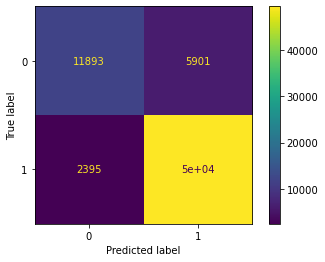

In [114]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

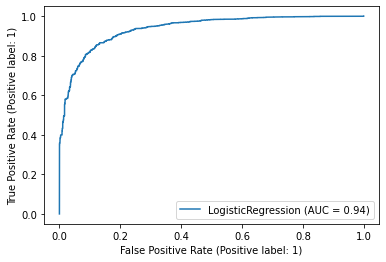

In [115]:
import matplotlib.pyplot as plt
from sklearn import metrics

metrics.plot_roc_curve(clf, X_test, y_test) 

In [116]:
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(8,8))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'